In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import datetime
import calendar

from IPython.display import Image

In [135]:
pd.set_option("display.max_columns",50)
pd.set_option("display.max_rows",400)

In [3]:
train_clean2 = pd.read_csv('new_train_clean2.csv', index_col = 0)

/Users/mengruiyin/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/mengruiyin/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
train_clean2.indrel_1mes[(train_clean2.indrel_1mes == '1.0') | (train_clean2.indrel_1mes == '1')] = 1.0
train_clean2.indrel_1mes[(train_clean2.indrel_1mes == '2.0') | (train_clean2.indrel_1mes == '2')] = 2.0
train_clean2.indrel_1mes[(train_clean2.indrel_1mes == '3.0') | (train_clean2.indrel_1mes == '3')] = 3.0
train_clean2.indrel_1mes[(train_clean2.indrel_1mes == '4.0') | (train_clean2.indrel_1mes == '4')] = 4.0

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/mengruiyin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/mengruiyin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/mengruiyin/an

In [5]:
def convert_dtype(df):    
    df['custoemr_dow'] = df['custoemr_dow'].astype('object')
    df['customer_wom'] = df['customer_wom'].astype('object')
    df['customer_m'] = df['customer_m'].astype('object')
    df['customer_y'] = df['customer_y'].astype('object')
    df['lastprimary_dow'] = df['lastprimary_dow'].astype('object')
    df['lastprimary_wom'] = df['lastprimary_wom'].astype('object')
    df['lastprimary_m'] = df['lastprimary_m'].astype('object')
    df['lastprimary_y'] = df['lastprimary_y'].astype('object')
    return df

In [6]:
train_clean2 = convert_dtype(train_clean2)

In [10]:
train_clean2.to_csv('new_train_clean2.csv')

In [7]:
def plot_binary(data, col_name, title, xlable):
    p1 = sns.countplot(x=col_name, data=data, palette="Greens_d")
    plt.title(title, fontsize = 15)
    for p in p1.patches:
        height = p.get_height()
        p1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/data.shape[0]),
                ha="center") 
    plt.xlabel(xlable)
    plt.show()

In [146]:
result = train_clean2.groupby([product[0], 'bins'], as_index = False)['ncodpers'].count()
result_0 = result[result[product[0]] == 0][[ 'bins','ncodpers']]
result_1 = result[result[product[0]] == 1][[ 'bins','ncodpers']]
result_0.columns = ['age range', str(product[0]) +'_num' ]
result_1.columns = ['age range', str(product[0]) +'_num' ]
d = result_0
b = result_1
c = pd.DataFrame(train_clean2.bins.unique())
c.columns = ['age range']
if result_1.shape[0] < len(train_clean2.bins.unique()):
    b = pd.merge(b, c, how = 'right').sort_values('age range')
    
if result_0.shape[0] < len(train_clean2.bins.unique()):
    d = pd.merge(d, c, how = 'right').sort_values('age range')
    
for name in product[1:]:
        a = train_clean2.groupby([name, 'bins'], as_index = False)['ncodpers'].count()
        a_0 = a[a[name] == 0][['bins', 'ncodpers']]
        a_1 = a[a[name] == 1][['bins', 'ncodpers']]
        a_0.columns = ['age range', str(name) +'_num' ]
        a_1.columns = ['age range', str(name) +'_num' ]
        d = pd.merge(d, a_0 , how = 'left', on = ['age range'])
        b = pd.merge(b, a_1 , how = 'left', on = ['age range'])
        result_0T = d.transpose()
        result_0T.columns = result_0T.iloc[0]
        result_0T = result_0T.iloc[1:]
        result_1T = b.transpose()
        result_1T.columns = result_1T.iloc[0]
        result_1T = result_1T.iloc[1:]

In [91]:
result_1T

age range,1-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80
ind_aval_fin_ult1_num,NaN,NaN,NaN,87,195,17,17,NaN
ind_cco_fin_ult1_num,36,309359,3805962,1228090,1682339,949918,488901,173055
ind_cder_fin_ult1_num,NaN,2,23,722,2269,1235,617,259
ind_cno_fin_ult1_num,NaN,3785,151927,261538,398206,188108,62385,16528
ind_ctju_fin_ult1_num,30435,98516,97,NaN,NaN,NaN,NaN,NaN
ind_ctma_fin_ult1_num,1,333,9022,40801,41438,20873,10966,3594
ind_ctop_fin_ult1_num,NaN,6,34454,194631,650530,383644,209266,89868
ind_ctpp_fin_ult1_num,NaN,NaN,9695,112705,247432,124225,53592,17161
ind_deco_fin_ult1_num,NaN,175,975,6187,7901,4554,2263,629
ind_deme_fin_ult1_num,NaN,NaN,337,3026,9047,5684,1932,671


In [79]:
b = pd.DataFrame(train_clean2.bins.unique())
b.columns = ['age range']
b.merge(result_1, how = 'left').sort_values('age range')

,age range,ind_ahor_fin_ult1_num
6,1-10,NaN
5,11-20,NaN
1,21-30,NaN
0,31-40,44.0
4,41-50,932.0
3,51-60,327.0
2,61-70,76.0
7,71-80,17.0


In [8]:
def plot_df(df, colname, column_name, groupby_name, groupby_name_list): 
    result = df.groupby([groupby_name, colname], as_index = False)['ncodpers'].count()
    result_0 = result[result[groupby_name] == 0][[colname, 'ncodpers']]
    result_1 = result[result[groupby_name] == 1][[colname, 'ncodpers']]
    result_0.columns = [column_name, str(product[0]) +'_num' ]
    result_1.columns = [column_name, str(product[0]) +'_num' ]
    d = result_0
    b = result_1
    c = pd.DataFrame(df[colname].unique())
    c.columns = [column_name]
    if result_1.shape[0] < len(df[colname].unique()):
        b = pd.merge(b, c, how = 'right').sort_values(column_name)
    
    if result_0.shape[0] < len(df[colname].unique()):
        d = pd.merge(d, c, how = 'right').sort_values(column_name)
    
    for name in product[1:]:
        a = df.groupby([name, colname], as_index = False)['ncodpers'].count()
        a_0 = a[a[name] == 0][[colname, 'ncodpers']]
        a_1 = a[a[name] == 1][[colname, 'ncodpers']]
        a_0.columns = [column_name, str(name) +'_num' ]
        a_1.columns = [column_name, str(name) +'_num' ]
        d = pd.merge(d, a_0 , how = 'left', on = column_name)
        b = pd.merge(b, a_1 , how = 'left', on = column_name)
        result_0T = d.transpose()
        result_0T.columns = result_0T.iloc[0]
        result_0T = result_0T.iloc[1:]
        result_1T = b.transpose()
        result_1T.columns = result_1T.iloc[0]
        result_1T = result_1T.iloc[1:]
#     ylabels = ['Saving Account', 'Guarantees', 'Current Accounts', 'Derivada Account', 'Payroll Account', 'Junior Account',
#           'Mas particular Account', 'particular Account', 'particular Plus Account', 'Short-term deposits', 'Medium-term deposites',
#           'Long-term deposits', 'e-account', 'Funds', 'Mortage', 'Pensions', 'Loans', 'Taxes', 'Credit Card', 'Securities', 
#           'Home Account', 'Payroll', 'Pensions2', 'Direct Debit'] 
    result_0T.index = ylabels
    result_1T.index = ylabels 
    return result_0T, result_1T

In [9]:
def explore_more_em(df):
    a = pd.DataFrame(df.pais_residencia.value_counts(normalize = True))
    b = pd.DataFrame(df.sexo.value_counts(normalize = True))
    #sns.distplot(df.age)
    c = pd.DataFrame(df.ind_nuevo.value_counts(normalize = True))
    #sns.distplot(df.antiguedad)
    d = pd.DataFrame(df.indrel.value_counts(normalize = True))
    e = pd.DataFrame(df.indrel_1mes.value_counts(normalize = True))
    f = pd.DataFrame(df.tiprel_1mes.value_counts(normalize = True))
    g = pd.DataFrame(df.indresi.value_counts(normalize = True))
    h = pd.DataFrame(df.indext.value_counts(normalize = True))
    i = pd.DataFrame(df.indfall.value_counts(normalize = True))
    j = pd.DataFrame(df.ind_actividad_cliente.value_counts(normalize= True))
    #sns.distplot(df.renta)
    k = pd.DataFrame(df.segmento.value_counts(normalize= True))
    m = pd.DataFrame(df.ind_empleado.value_counts(normalize= True))
    n = pd.DataFrame(df.bins.value_counts(normalize= True))
    o = pd.DataFrame(df.canal_entrada.value_counts(normalize= True))
    p = pd.DataFrame(df.nomprov.value_counts(normalize= True))
    q = pd.DataFrame(df.custoemr_dow.value_counts(normalize= True))
    r = pd.DataFrame(df.customer_wom.value_counts(normalize= True))
    s = pd.DataFrame(df.customer_m.value_counts(normalize= True))
    t = pd.DataFrame(df.customer_y.value_counts(normalize= True))
    u = pd.DataFrame(df.lastprimary_dow.value_counts(normalize= True))
    v = pd.DataFrame(df.lastprimary_m.value_counts(normalize= True))
    w = pd.DataFrame(df.lastprimary_wom.value_counts(normalize= True))
    x = pd.DataFrame(df.lastprimary_y.value_counts(normalize= True))
   
    list1 = list([['country residence']*a.shape[0]])
    list1.append(['gender']*b.shape[0])
    list1.append(['new customer']*c.shape[0])
    list1.append(['primary customer']*d.shape[0])
    #.\
    list1.append(['customer_type_beginning']*e.shape[0])
    list1.append(['customer_relation']*f.shape[0])
    list1.append(['residence_index']*g.shape[0])
    list1.append(['foreign_index']*h.shape[0])
    list1.append(['deceased index']*i.shape[0])
    list1.append(['activity index']*j.shape[0])
    list1.append(['segmentation']*k.shape[0])
    list1.append(['employment status']*m.shape[0])
    
    list1.append(['age range']*n.shape[0])
    list1.append(['channel']*o.shape[0])
    list1.append(['province']*p.shape[0])
    list1.append(['day of week of being customer']*q.shape[0])
    list1.append(['week of month of being customer']*r.shape[0])
    list1.append(['month of being customer']*s.shape[0])
    list1.append(['year of being customer']*t.shape[0])
    list1.append(['day of week as primary']*u.shape[0])
    list1.append(['month as primary']*v.shape[0])
    list1.append(['week of month as primary']*w.shape[0])
    list1.append(['year as primary']*x.shape[0])
    
    
# #     arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
# #     ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
    list1 = sum(list1,[])
    list2 = [list(a.index)]
    list2.append((list(b.index)))
    list2.append((list(c.index)))
    list2.append((list(d.index)))
    list2.append((list(e.index)))
    list2.append((list(f.index)))
    list2.append((list(g.index)))
    list2.append((list(h.index)))
    list2.append((list(i.index)))
    list2.append((list(j.index)))
    list2.append((list(k.index)))
    list2.append((list(m.index)))
    
    list2.append((list(n.index)))
    list2.append((list(o.index)))
    list2.append((list(p.index)))
    list2.append((list(q.index)))
    list2.append((list(r.index)))
    list2.append((list(s.index)))
    list2.append((list(t.index)))
    list2.append((list(u.index)))
    list2.append((list(v.index)))
    list2.append((list(w.index)))
    list2.append((list(x.index)))
    list2 = sum(list2,[])
    
    arrays =[list1,list2]
    tuples = list(zip(*arrays))
    index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
    value = a.values.tolist()
    value.append(sum(b.values.tolist(), []))
    value.append(sum(c.values.tolist(), []))
    value.append(sum(d.values.tolist(), []))
    value.append(sum(e.values.tolist(), []))
    value.append(sum(f.values.tolist(), []))
    value.append(sum(g.values.tolist(), []))
    value.append(sum(h.values.tolist(), []))
    value.append(sum(i.values.tolist(), []))
    value.append(sum(j.values.tolist(), []))
    value.append(sum(k.values.tolist(), []))
    value.append(sum(m.values.tolist(), []))
    
    value.append(sum(n.values.tolist(), []))
    value.append(sum(o.values.tolist(), []))
    value.append(sum(p.values.tolist(), []))
    value.append(sum(q.values.tolist(), []))
    value.append(sum(r.values.tolist(), []))
    value.append(sum(s.values.tolist(), []))
    value.append(sum(t.values.tolist(), []))
    value.append(sum(u.values.tolist(), []))
    value.append(sum(v.values.tolist(), []))
    value.append(sum(w.values.tolist(), []))
    value.append(sum(x.values.tolist(), []))
    
    value = np.array(sum(value,[]))
    s = pd.Series(value, index=index)
    return s

In [335]:
train_clean2_description2 = explore_more_em(train_clean2)
train_clean2_description2.to_csv('train_clean2_description2.csv')

In [10]:
product = list(train_clean2.filter(regex='^ind.*ult1$', axis=1))
product

['ind_ahor_fin_ult1',
 'ind_aval_fin_ult1',
 'ind_cco_fin_ult1',
 'ind_cder_fin_ult1',
 'ind_cno_fin_ult1',
 'ind_ctju_fin_ult1',
 'ind_ctma_fin_ult1',
 'ind_ctop_fin_ult1',
 'ind_ctpp_fin_ult1',
 'ind_deco_fin_ult1',
 'ind_deme_fin_ult1',
 'ind_dela_fin_ult1',
 'ind_ecue_fin_ult1',
 'ind_fond_fin_ult1',
 'ind_hip_fin_ult1',
 'ind_plan_fin_ult1',
 'ind_pres_fin_ult1',
 'ind_reca_fin_ult1',
 'ind_tjcr_fin_ult1',
 'ind_valo_fin_ult1',
 'ind_viv_fin_ult1',
 'ind_nomina_ult1',
 'ind_nom_pens_ult1',
 'ind_recibo_ult1']

In [11]:
quant_cols  = train_clean2.columns.values[((train_clean2.dtypes =='int64') | (train_clean2.dtypes =='float64')) & (~train_clean2.columns.isin(product))]
quant_cols

array(['ncodpers', 'age', 'ind_nuevo', 'antiguedad', 'indrel',
       'ind_actividad_cliente', 'renta', 'card number'], dtype=object)

In [12]:
qual_cols = train_clean2.columns.values[(train_clean2.dtypes == 'object') & (~train_clean2.columns.isin(product))]
qual_cols

array(['fecha_dato', 'ind_empleado', 'pais_residencia', 'sexo',
       'fecha_alta', 'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes',
       'indresi', 'indext', 'canal_entrada', 'indfall', 'cod_prov',
       'nomprov', 'segmento', 'custoemr_dow', 'customer_wom',
       'customer_m', 'customer_y', 'lastprimary_dow', 'lastprimary_wom',
       'lastprimary_m', 'lastprimary_y', 'bins'], dtype=object)

In [13]:
card = train_clean2[train_clean2['card number'] >0]
no_card = train_clean2[train_clean2['card number'] == 0]

In [14]:
ylabels = ['Saving Account', 'Guarantees', 'Current Accounts', 'Derivada Account', 'Payroll Account', 'Junior Account',
          'Mas particular Account', 'particular Account', 'particular Plus Account', 'Short-term deposits', 'Medium-term deposites',
          'Long-term deposits', 'e-account', 'Funds', 'Mortage', 'Pensions', 'Loans', 'Taxes', 'Credit Card', 'Securities', 
          'Home Account', 'Payroll', 'Pensions2', 'Direct Debit'] 

In [15]:
color = [(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
         
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
         
 (0.10361479515598847, 0.09497494261006116, 0.20622110711523312),
 (0.08259385956193721, 0.27284810506762325, 0.3077201223179875),
 (0.17004232121057958, 0.43679759647517286, 0.2237255555555555),
 (0.4587619752319175, 0.48057366087571074, 0.19972785287539777),
 (0.7576693751824222, 0.47696440257052414, 0.4377552097141371),
 (0.8299576787894204, 0.5632024035248271, 0.7762744444444444),
 (0.763897854764939, 0.7572688769419182, 0.9494023023345208),
 (0.8106543271652416, 0.9218447051984724, 0.9373759048616408)]

In [333]:
train_clean2..value_counts(normalize = True)

MADRID                    0.317272
BARCELONA                 0.094253
VALENCIA                  0.050195
SEVILLA                   0.044974
CORUÑA, A                 0.032192
MURCIA                    0.029997
MALAGA                    0.027348
ZARAGOZA                  0.024861
ALICANTE                  0.023177
CADIZ                     0.022027
PONTEVEDRA                0.021150
ASTURIAS                  0.019637
PALMAS, LAS               0.017608
VALLADOLID                0.017571
BADAJOZ                   0.014554
TOLEDO                    0.013624
GRANADA                   0.013245
BIZKAIA                   0.012982
SALAMANCA                 0.012169
CANTABRIA                 0.011367
CORDOBA                   0.010769
CACERES                   0.009782
BALEARS, ILLES            0.009333
HUELVA                    0.009230
CIUDAD REAL               0.008943
ALBACETE                  0.008587
CASTELLON                 0.007832
TARRAGONA                 0.007452
BURGOS              

In [279]:
card_dis = pd.DataFrame(train_clean2[product].sum())
card_dis.columns = ['card number']
card_dist = card_dis/card_dis.sum()
card_dist.index = ylabels
card_dist

,card number
Saving Account,0.000073
Guarantees,0.000017
Current Accounts,0.451150
Derivada Account,0.000268
Payroll Account,0.056538
Junior Account,0.006740
Mas particular Account,0.006635
particular Account,0.081605
particular Plus Account,0.029500
Short-term deposits,0.001185


* saving account: 0.0073%
* guarantees: 0.0017%
* current account: 45%
* derivada account: 0.0268%
* payroll account: 5.65%
* junior account: 0.674%
* mas particular account: 0.6635%
* particular account: 8.1605%
* particular plus account: 2.95%
* short_term deposits: 0.1185%
* Medium-term deposites: 0.1081%
* Long-term deposits: 2.7625%
* e-account: 5.6239%
* Funds: 1.2045%
* Mortage: 0.4174%
* Pensions: 0.6485%
* Loans: 0.1778%
* Taxes: 3.6017%
* Credit Card: 3.1138%
* Securities: 1.7232%
* Home Account: 0.2710%
* Payroll: 3.8896%
* Pensions2: 4.1422%
* Direct Debit: 8.9448%

--------------------------------------------------Age vs card type----------------------------------------------------

In [148]:
age_dis0, age_dis1 = plot_df(train_clean2, 'bins', 'age range', product[0], product[1:])

In [272]:
age_dis1.fillna(0, inplace = True)
age_dis1['sum'] = age_dis1.sum(axis = 1)
age_dis1.iloc[:,0:7].div(age_dis1['sum'], axis = 0)

age range,1-10,11-20,21-30,31-40,41-50,51-60,61-70
Saving Account,0.000000,0.000000,0.000000,0.031519,0.667622,0.234241,0.054441
Guarantees,0.000000,0.000000,0.000000,0.275316,0.617089,0.053797,0.053797
Current Accounts,0.000004,0.035815,0.440624,0.142179,0.194768,0.109974,0.056601
Derivada Account,0.000000,0.000390,0.004486,0.140823,0.442559,0.240882,0.120343
Payroll Account,0.000000,0.003497,0.140351,0.241611,0.367866,0.173776,0.057632
Junior Account,0.235842,0.763406,0.000752,0.000000,0.000000,0.000000,0.000000
Mas particular Account,0.000008,0.002621,0.071024,0.321197,0.326212,0.164318,0.086327
particular Account,0.000000,0.000004,0.022052,0.124572,0.416366,0.245548,0.133939
particular Plus Account,0.000000,0.000000,0.017165,0.199545,0.438080,0.219941,0.094885
Short-term deposits,0.000000,0.007715,0.042982,0.272747,0.348307,0.200758,0.099762


In [175]:
# a = age_dis1.iloc[:,0:7].div(age_dis1['sum'], axis = 0)
# a.to_csv('age distribution for card holders.csv')

In [177]:
# p1 = age_dis1.plot.bar(stacked=True, title = 'age distributon for each type of credit card',
#                   fontsize = 25, figsize = (25,25), colormap = 'Paired')
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

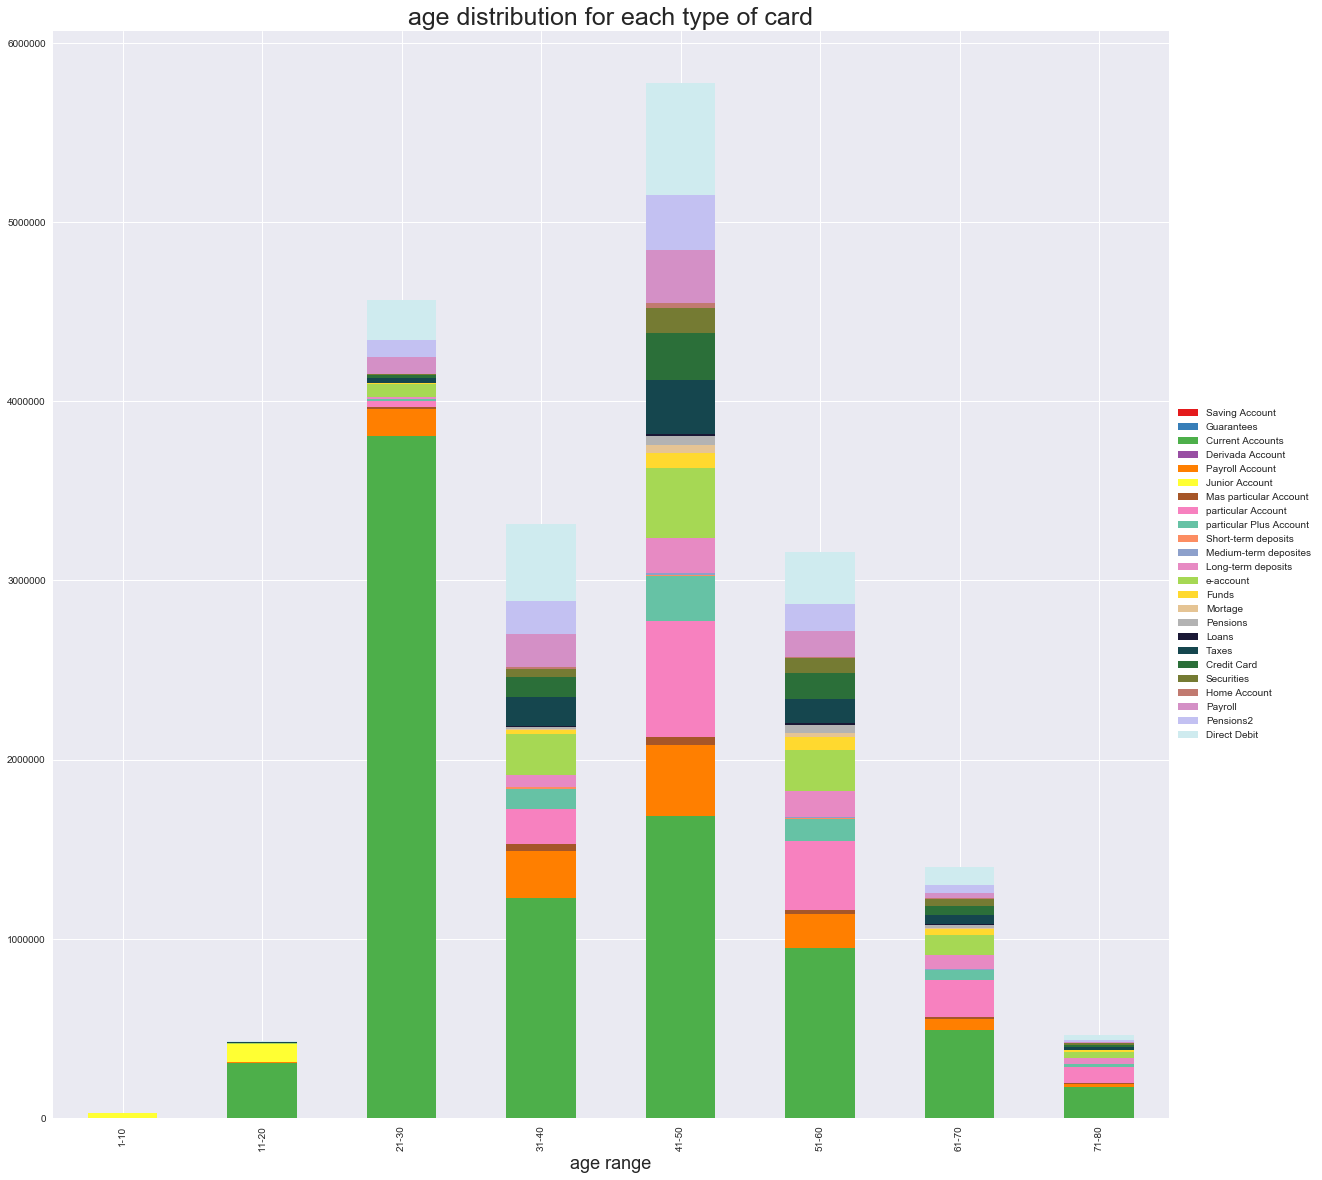

In [173]:
p1 = age_dis1.transpose().plot(kind='bar', stacked=True,
          colormap= ListedColormap(color), figsize = (20,20))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('age distribution for each type of card', fontsize = 25)
plt.xlabel("age range", fontsize = 18)

------------------------------ind_nuevo: new customer index vs card type----------------------------------------------

In [182]:
card.ind_nuevo.value_counts(normalize = True)

0.0    0.945265
1.0    0.054735
Name: ind_nuevo, dtype: float64

In [183]:
no_card.ind_nuevo.value_counts(normalize = True)

0.0    0.908331
1.0    0.091669
Name: ind_nuevo, dtype: float64

* card: 
    * nex customer index: 95%:1; 5%: 0
* no card:
    * new customer index: 91%:1; 9%: 0

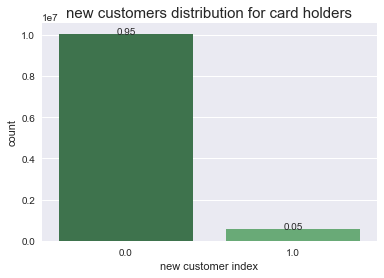

In [284]:
plot_binary(card, 'ind_nuevo', 'new customers distribution for card holders', 'new customer index')

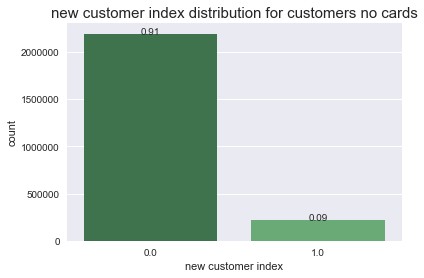

In [285]:
plot_binary(no_card, 'ind_nuevo', 'new customer index distribution for customers no cards', 'new customer index')

In [165]:
ind_nuevo0, ind_nuevo1 = plot_df(train_clean2, 'ind_nuevo', 'new customer index', product[0], product[1:])

In [292]:
ind_nuevo1['sum'] = ind_nuevo1.sum(axis = 1)

In [298]:
ind_nuevo1.iloc[:,0:2].div(ind_nuevo1['sum'], axis = 0)

new customer index,0.0,1.0
Saving Account,1.000000,NaN
Guarantees,0.990506,0.009494
Current Accounts,0.938338,0.061662
Derivada Account,0.995514,0.004486
Payroll Account,0.977707,0.022293
Junior Account,0.967601,0.032399
Mas particular Account,0.843940,0.156060
particular Account,0.999988,0.000012
particular Plus Account,0.999968,0.000032
Short-term deposits,0.441721,0.558279


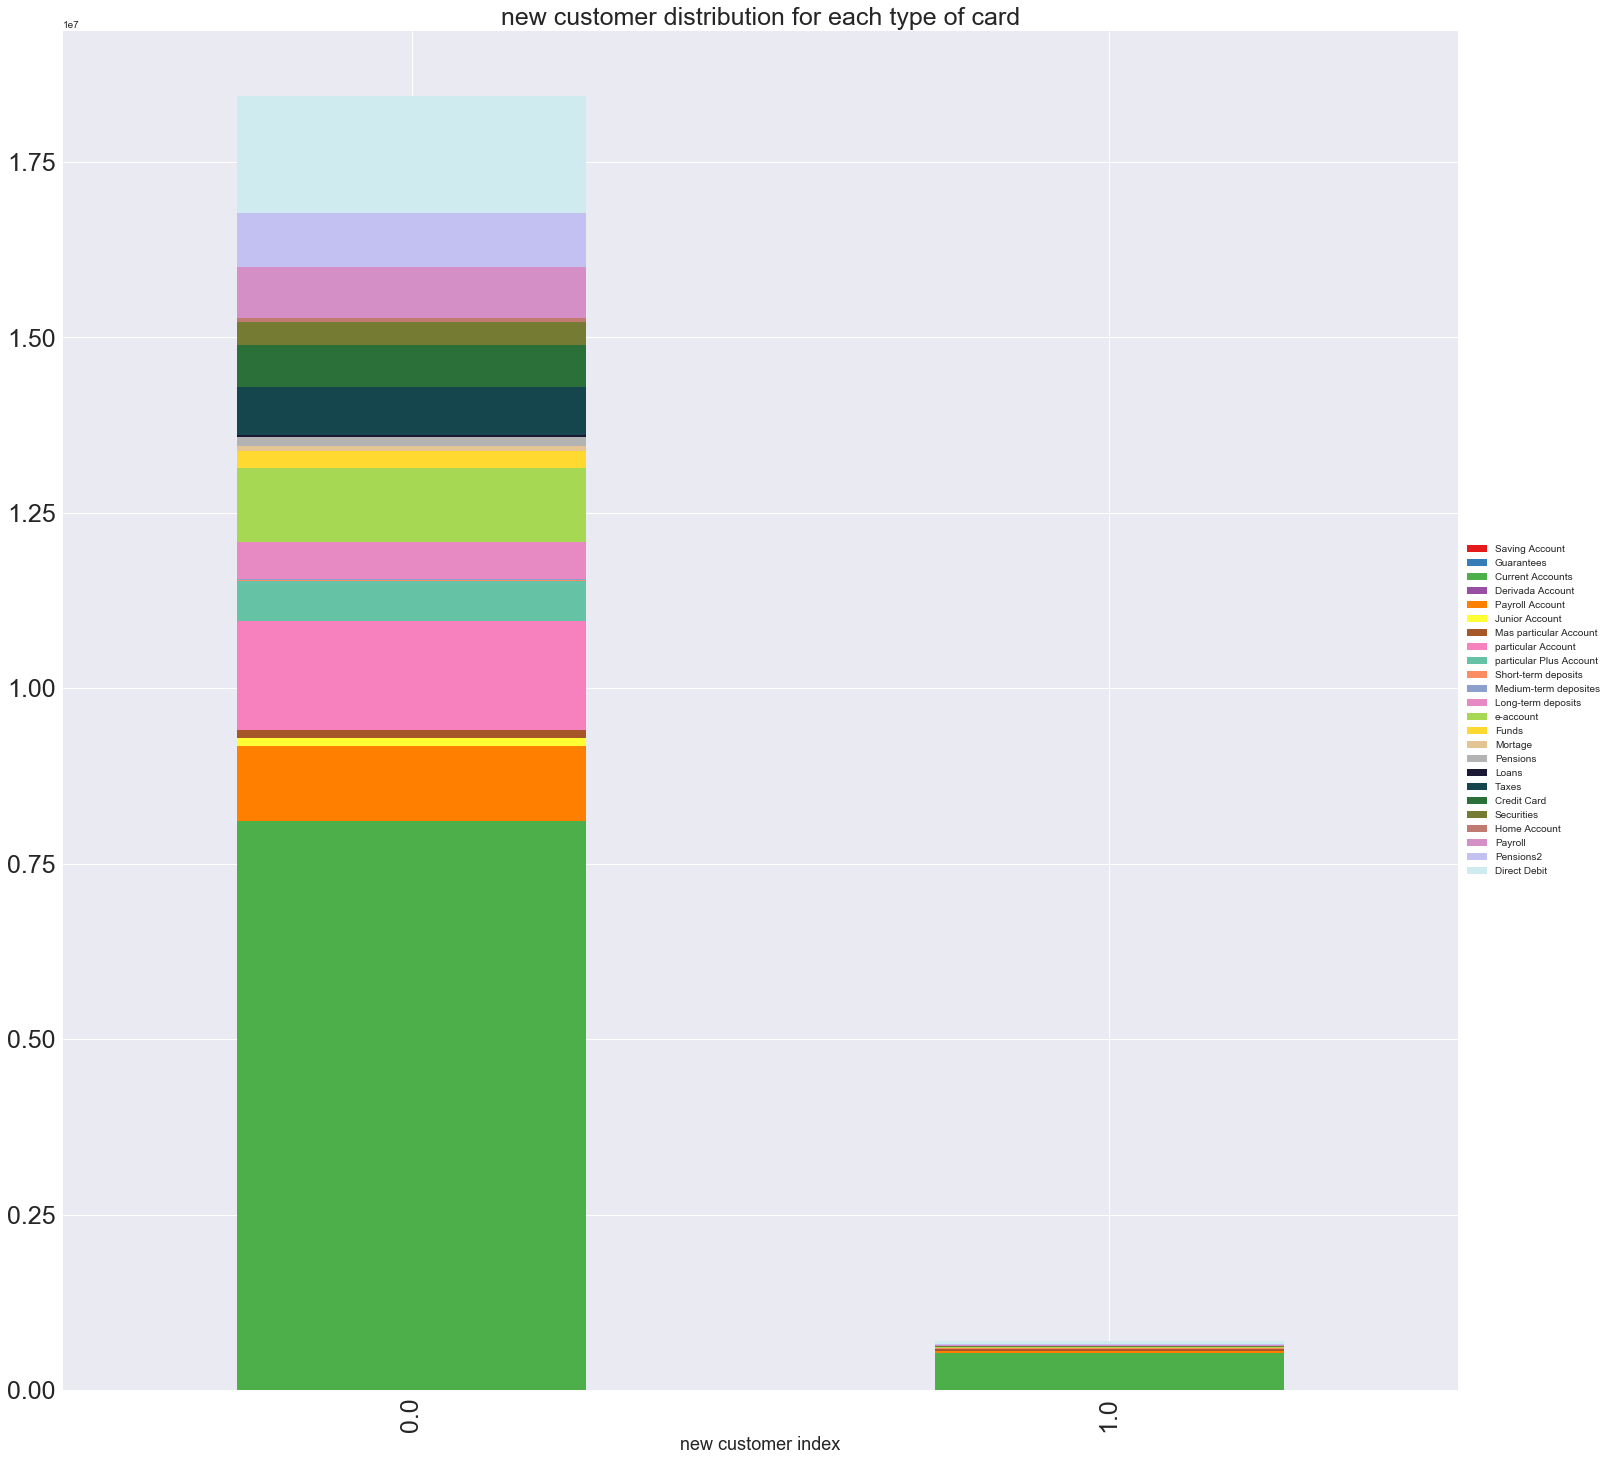

In [174]:
p1 = ind_nuevo1.transpose().plot(kind = 'bar', stacked=True, title = 'age distributon for each type of credit card',
                  fontsize = 25, figsize = (25,25), colormap = ListedColormap(color))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('new customer distribution for each type of card', fontsize = 25)
plt.xlabel("new customer index", fontsize = 18)

----------------------------------------antiguedad: seniority vs card type--------------------------------------------

-----------------------------------------indrel: primary customer vs card type----------------------------------------

In [184]:
card.indrel.value_counts(normalize = True)

1.0     0.999545
99.0    0.000455
Name: indrel, dtype: float64

In [185]:
no_card.indrel.value_counts(normalize=True)

1.0     0.992176
99.0    0.007824
Name: indrel, dtype: float64

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


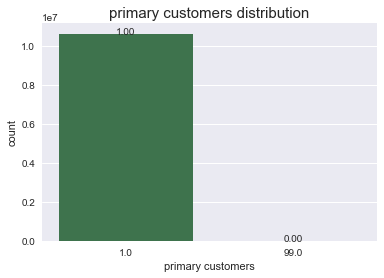

In [186]:
plot_binary(card, 'indrel', 'primary customers distribution', 'primary customers')

In [187]:
indrel0, indrel1 = plot_df(train_clean2, 'indrel', 'primary customer', product[0], product[1:])

In [189]:
indrel1.transpose()

,Saving Account,Guarantees,Current Accounts,Derivada Account,Payroll Account,Junior Account,Mas particular Account,particular Account,particular Plus Account,Short-term deposits,Medium-term deposites,Long-term deposits,e-account,Funds,Mortage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions2,Direct Debit
primary customer,,,,,,,,,,,,,,,,,,,,,,,,
1.0,1396.0,316.0,8634511.0,5127.0,1082311.0,128957.0,126856.0,1562095.0,564719.0,22492.0,20683.0,528803.0,1076302.0,230576.0,79908.0,124152.0,34040.0,689099.0,596087.0,329880.0,51889.0,744564.0,792920.0,1711752.0
99.0,NaN,NaN,3149.0,NaN,166.0,91.0,172.0,304.0,91.0,192.0,14.0,95.0,434.0,30.0,6.0,5.0,8.0,469.0,75.0,35.0,NaN,135.0,139.0,810.0


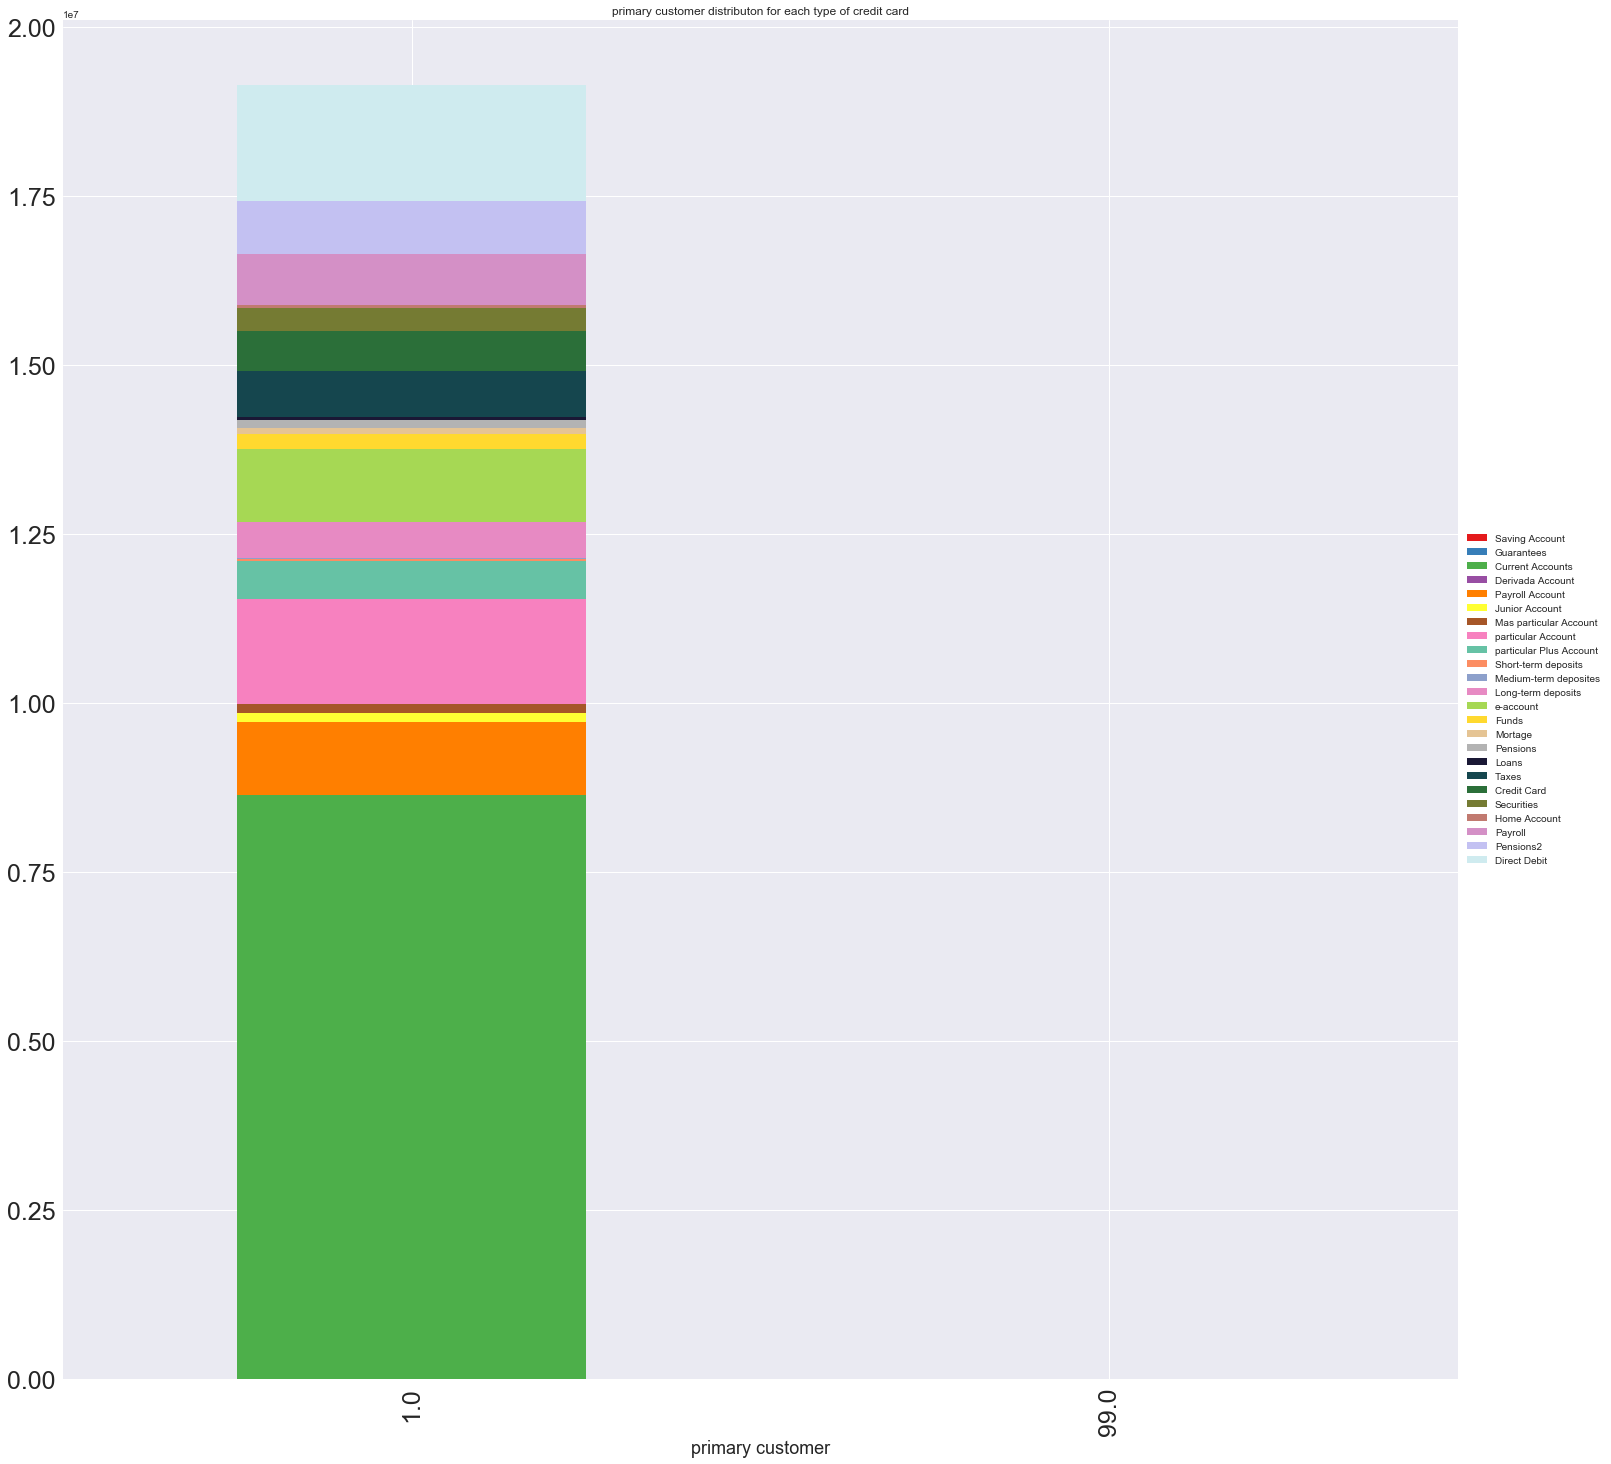

In [188]:
p1 = indrel1.transpose().plot(kind = 'bar', stacked=True, title = 'primary customer distributon for each type of credit card',
                  fontsize = 25, figsize = (25,25), colormap = ListedColormap(color))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("primary customer", fontsize = 18)

--------------------------------------ind_actividad_cliente vs card type----------------------------------------------

In [192]:
card.ind_actividad_cliente.value_counts(normalize = True)

1.0    0.56138
0.0    0.43862
Name: ind_actividad_cliente, dtype: float64

In [193]:
no_card.ind_actividad_cliente.value_counts(normalize = True)

0.0    0.992045
1.0    0.007955
Name: ind_actividad_cliente, dtype: float64

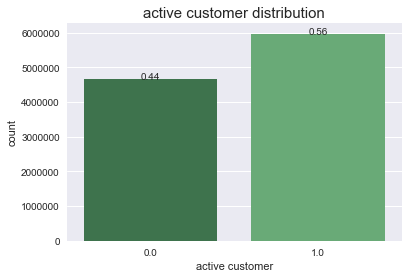

In [196]:
plot_binary(card, 'ind_actividad_cliente', 'active customer distribution', 'active customer')

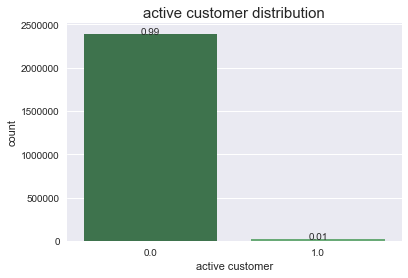

In [197]:
plot_binary(no_card, 'ind_actividad_cliente', 'active customer distribution', 'active customer')

In [199]:
active0, active1 = plot_df(train_clean2, 'ind_actividad_cliente', 'active customer', product[0], product[1:])
active1

active customer,0.0,1.0
Saving Account,374.0,1022.0
Guarantees,NaN,316.0
Current Accounts,4176363.0,4461297.0
Derivada Account,433.0,4694.0
Payroll Account,13921.0,1068556.0
Junior Account,22990.0,106058.0
Mas particular Account,26151.0,100877.0
particular Account,478222.0,1084177.0
particular Plus Account,96343.0,468467.0
Short-term deposits,2343.0,20341.0


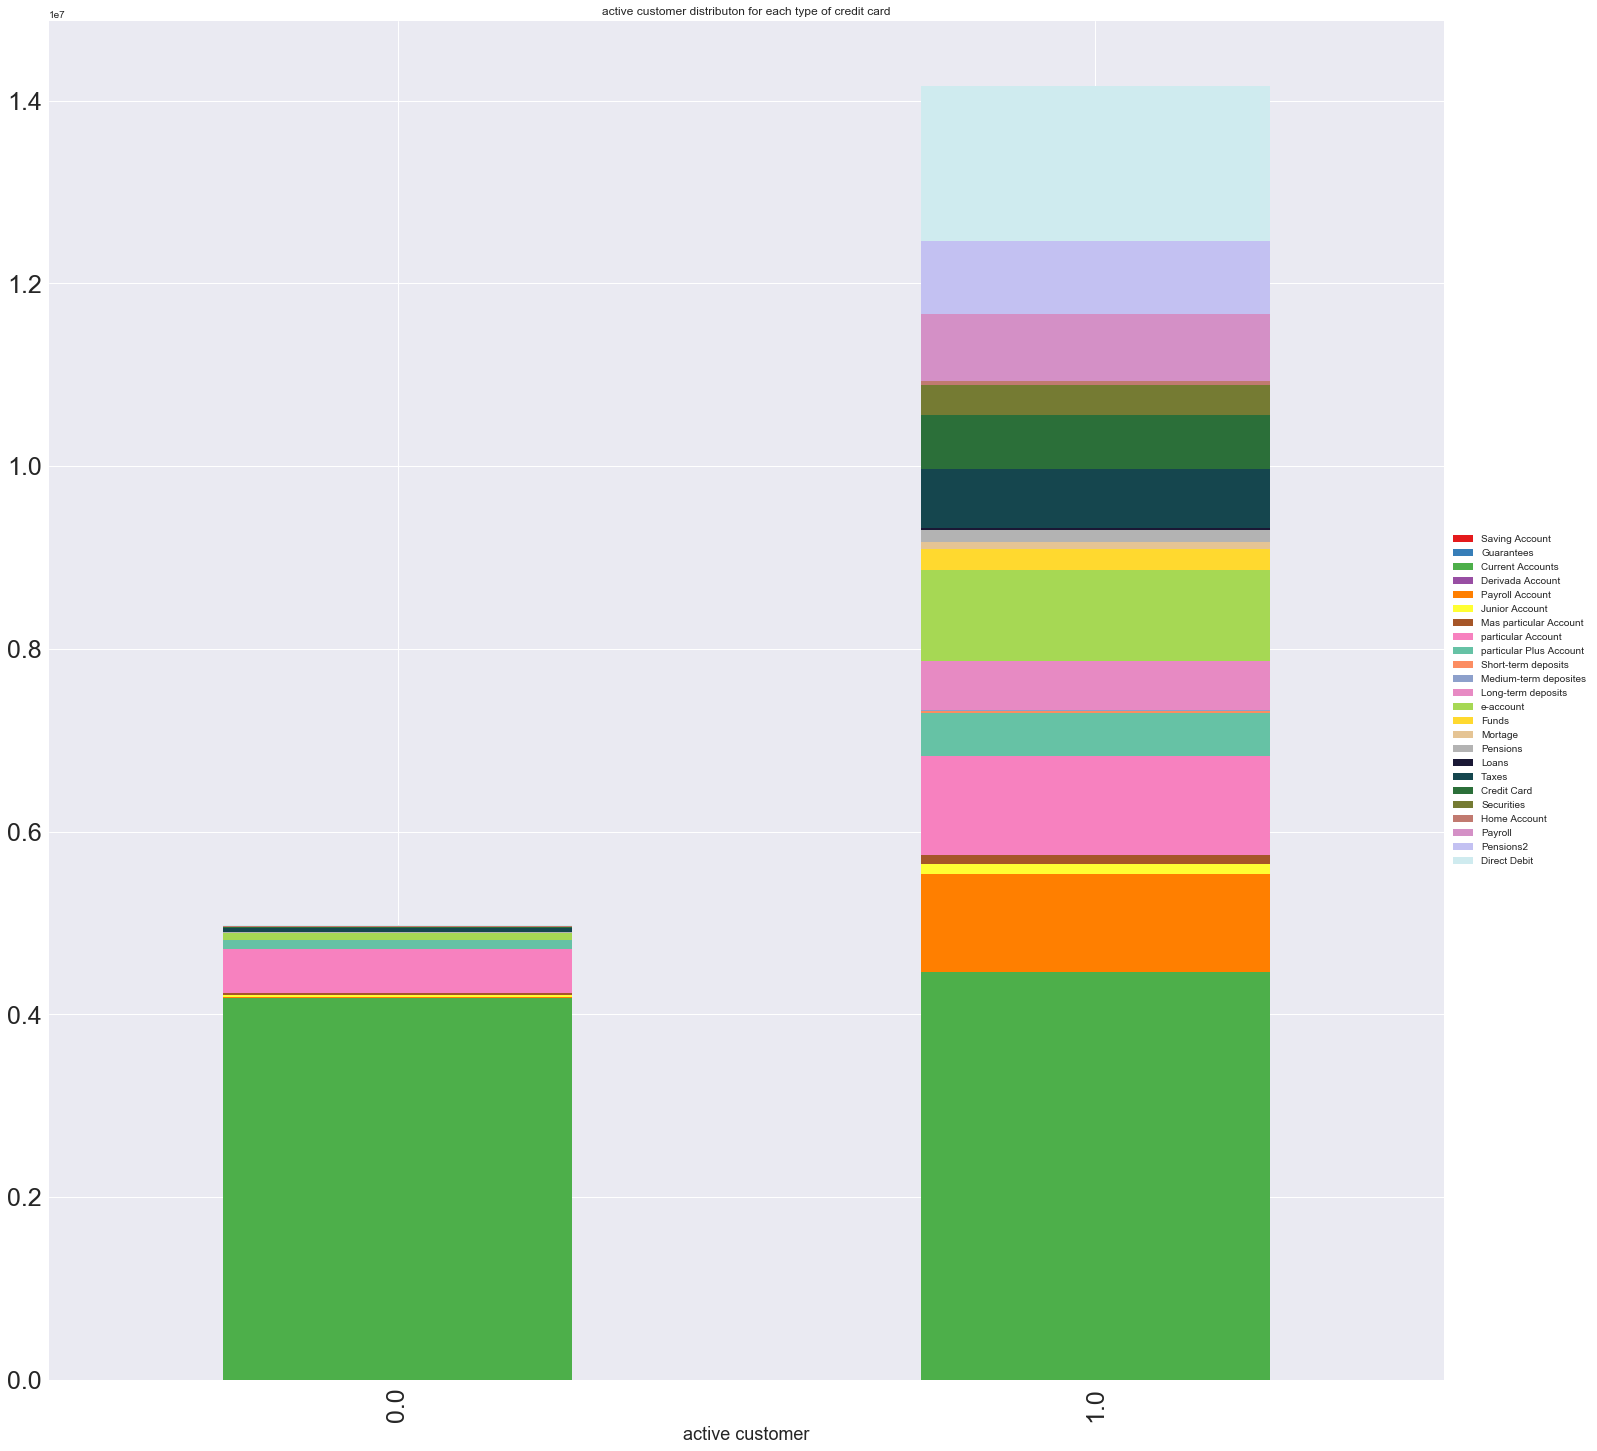

In [200]:
p1 = active1.transpose().plot(kind = 'bar', stacked=True, title = 'active customer distributon for each type of credit card',
                  fontsize = 25, figsize = (25,25), colormap = ListedColormap(color))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("active customer", fontsize = 18)

---------------------------------------------renata-------------------------------------------------------------------

-----------------------------------------------ind_empleado-----------------------------------------------------------

In [202]:
card.ind_empleado.value_counts(normalize = True)

N    0.999251
B    0.000292
A    0.000228
F    0.000227
S    0.000002
Name: ind_empleado, dtype: float64

In [203]:
no_card.ind_empleado.value_counts(normalize = True)

N    0.999743
B    0.000190
F    0.000046
A    0.000021
Name: ind_empleado, dtype: float64

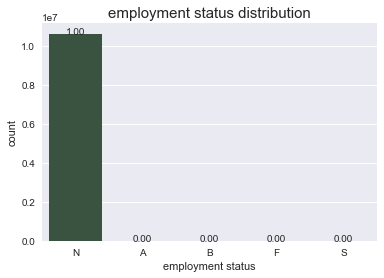

In [204]:
plot_binary(card, 'ind_empleado', 'employment status distribution', 'employment status')

In [205]:
employment0, employment1 = plot_df(train_clean2, 'ind_empleado', 'employment status', product[0], product[1:])
employment1

employment status,A,B,F,N,S
Saving Account,NaN,17,NaN,1379,NaN
Guarantees,17,NaN,17,282,NaN
Current Accounts,1523,2212,2015,8.63191e+06,NaN
Derivada Account,41,NaN,39,5047,NaN
Payroll Account,1199,992,419,1079850,17
Junior Account,NaN,NaN,NaN,129048,NaN
Mas particular Account,NaN,NaN,NaN,127028,NaN
particular Account,489,1139,1189,1.55958e+06,NaN
particular Plus Account,897,539,437,562937,NaN
Short-term deposits,17,NaN,NaN,22667,NaN


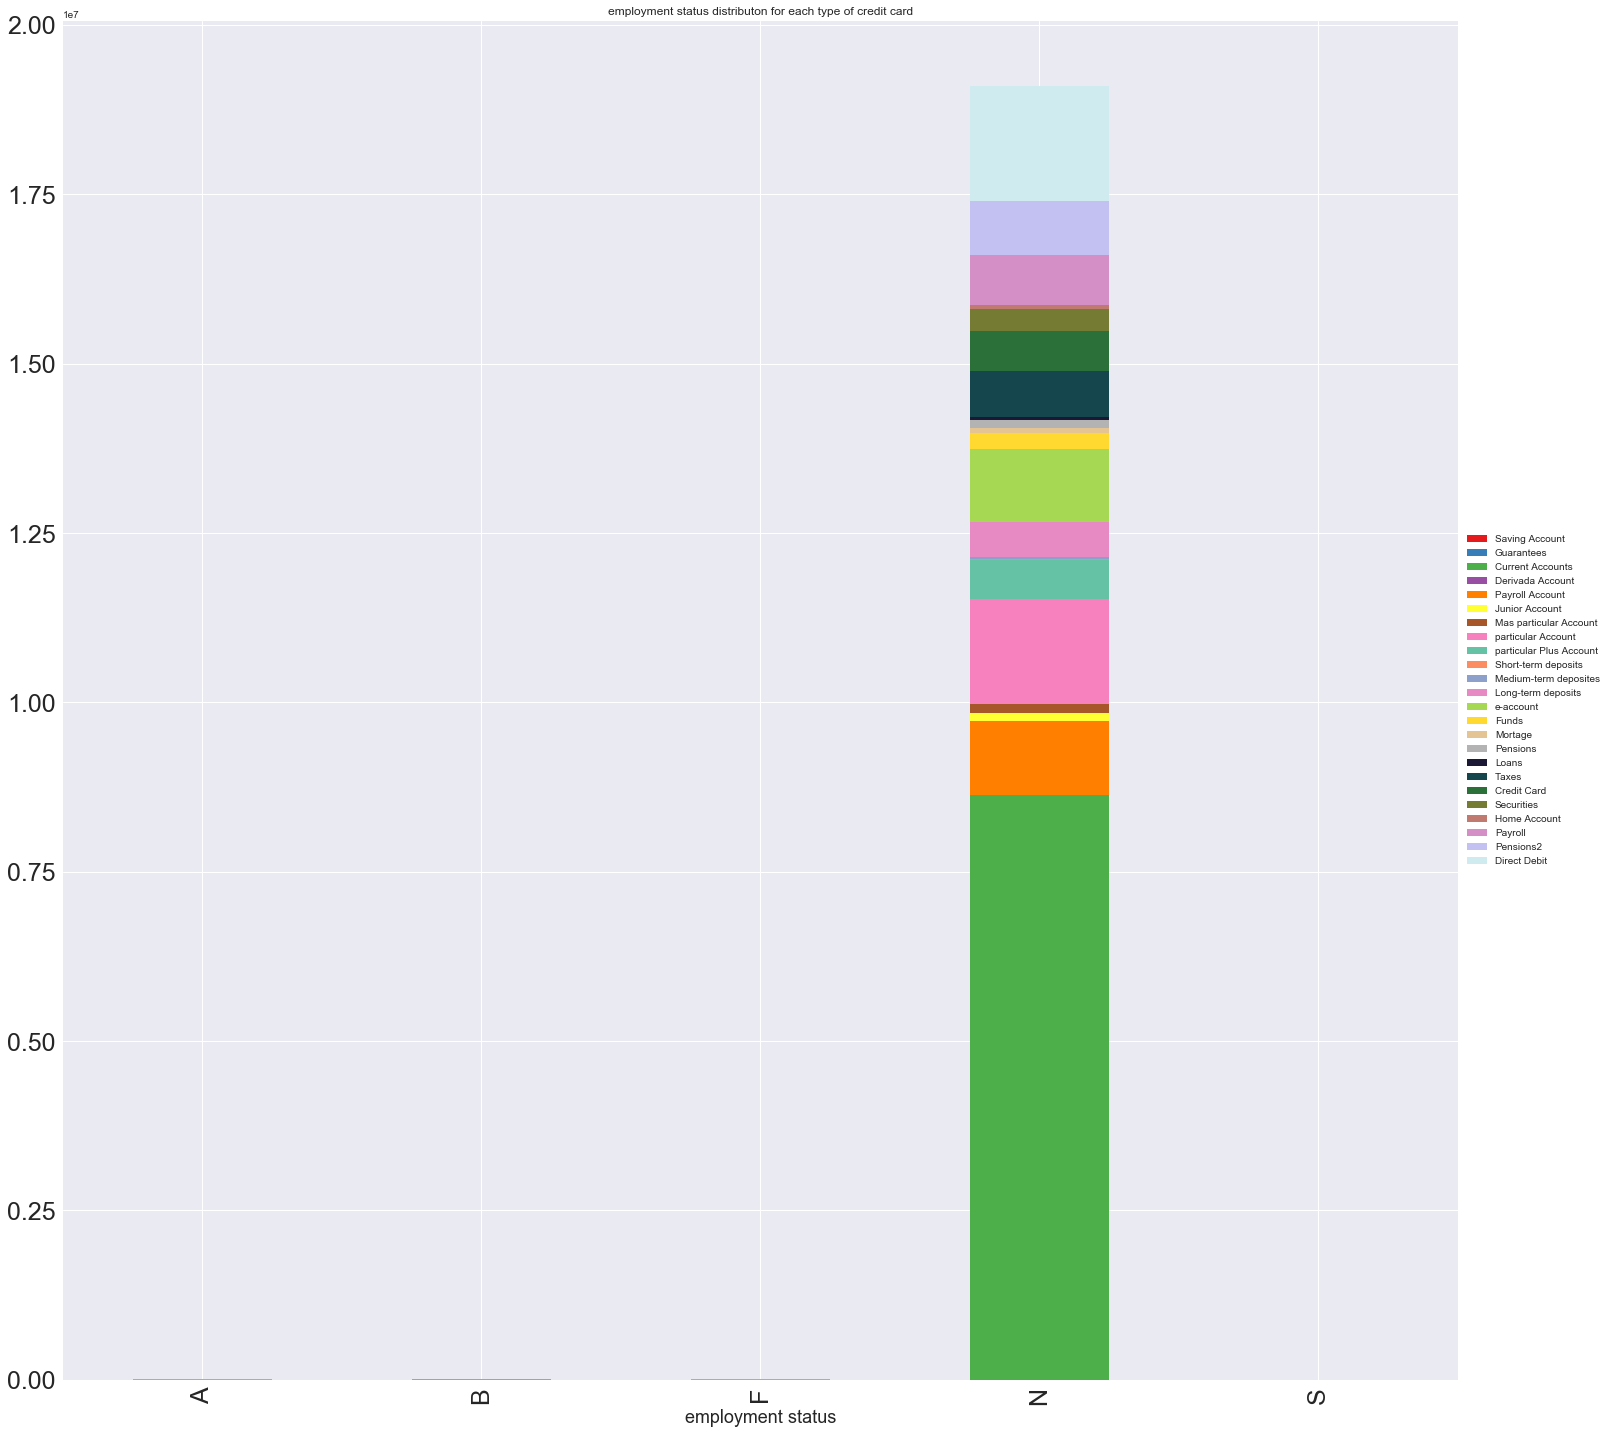

In [207]:
p1 = employment1.transpose().plot(kind = 'bar', stacked=True, title = 'employment status distributon for each type of credit card',
                  fontsize = 25, figsize = (25,25), colormap = ListedColormap(color))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("employment status", fontsize = 18)


In [180]:
quant_cols

array(['ncodpers', 'age', 'ind_nuevo', 'antiguedad', 'indrel',
       'ind_actividad_cliente', 'renta', 'card number'], dtype=object)

In [201]:
qual_cols

array(['fecha_dato', 'ind_empleado', 'pais_residencia', 'sexo',
       'fecha_alta', 'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes',
       'indresi', 'indext', 'canal_entrada', 'indfall', 'cod_prov',
       'nomprov', 'segmento', 'custoemr_dow', 'customer_wom',
       'customer_m', 'customer_y', 'lastprimary_dow', 'lastprimary_wom',
       'lastprimary_m', 'lastprimary_y', 'bins'], dtype=object)

In [34]:
def each_card_summary(df, card_type):
    card1_1 = df[df[card_type] == 1]
    card1_1_summary = explore_more_em(card1_1)
    #card1_1_summary.to_csv(card1_file)
    
    card1_0 = df[df[card_type] == 0]
    card1_0_summary = explore_more_em(card1_0)
    #card1_0_summary.to_csv(card0_file)
    return card1_1_summary, card1_0_summary

In [130]:
def find_card(df):
    summary = []
    for l in range(len(product)):
        summary.append(df.groupby(product[l])['ncodpers'].count())
    a = pd.DataFrame(summary)
    a.index = ylabels 
    a.columns = ['no card', 'card']
    return a 
    #a.index.names = ylabel

In [29]:
card_0 = {}
card_1 = {}
for i in range(24):
    card_1[i], card_0[i] =  each_card_summary(train_clean2, product[i])
    card_1[i].to_csv(str(ylabels[i])+'_1.csv')
    card_0[i].to_csv(str(ylabels[i])+'_0.csv')

### 24 types card analysis

----------------------------------------------Saving Account----------------------------------------------------------

In [64]:
card_1[0]

first                            second           
country residence                ES                   1.000000
gender                           V                    0.755014
                                 H                    0.244986
new customer                     0.0                  1.000000
primary customer                 1.0                  1.000000
customer_type_beginning          1.0                  1.000000
customer_relation                A                    0.714183
                                 I                    0.285817
residence_index                  S                    1.000000
foreign_index                    N                    0.940544
                                 S                    0.059456
deceased index                   N                    1.000000
activity index                   1.0                  0.732092
                                 0.0                  0.267908
segmentation                     02 - PARTICULARES    0.917622
    

* <font color='red'> all customers live in Spain</font>
*  <font color='red'> female customers(75.5%) are more than male customers(24.5%).</font>
* <font color='red'> all customers are old customers.</font>
* all customers are primary customers. 
* 71.4% of customers are active at the beginning of the month and 28.6% of custoemrs are inactive.
* 94% of customers were born in Spian and 6% of customers were born in other countries. 
* <font color='red'> 73% of customers are active customers and 27% are inactive customers. </font>
* <font color='red'> 91.62% of customers are individual type.  </font>
* <font color='red'> 66.76% of customers are between 41-50 years old, much more than general trend. 23.4% of customers are between 51-60 years old. So people older than 41 years old are dominated customers of this type card.  </font>
* KAT is the most frequent channel to be used for saving account register.

In [65]:
card_1[1]

first                            second           
country residence                ES                   0.946203
                                 AD                   0.053797
gender                           V                    0.743671
                                 H                    0.256329
new customer                     0.0                  0.990506
                                 1.0                  0.009494
primary customer                 1.0                  1.000000
customer_type_beginning          1.0                  1.000000
customer_relation                A                    1.000000
residence_index                  S                    0.946203
                                 N                    0.053797
foreign_index                    N                    1.000000
deceased index                   N                    1.000000
activity index                   1.0                  1.000000
segmentation                     02 - PARTICULARES    0.594937
    

* <font color='red'> 94.6% of customers live in Spain and 5.4% of customers live in Andorra(AD)</font>. 
*  <font color='red'> Female customers(74.4%) are more than male customers(25.6%).</font>
* All customers are primary customers. So all customers are primary/first customers at the beginning of the month. 
* <font color='red'> All customers are active at the beginning of the month. </font>
* All customers were born in Spian. 
* All customers are active customers. </font>
* <font color='red'> 60% of customers are individual type and 40% of customers are VIP(a large part of customers).  </font>
* <font color='red'> 62% of customers are between 41-50 years old, much more than general trend. 27.5% of customers are between 51-60 years old. So people older than 41 years old are dominated customers of this type card.  </font>
* KAT and KFC are two most frequent channel to be used for saving account register.

-----------------------------------------------Current Account--------------------------------------------------------

In [71]:
pd.DataFrame(card_1[2])

0
first                    second              
country residence        ES      9.945510e-01
                         FR      4.290514e-04
                         GB      4.260413e-04
                         DE      4.030027e-04
                         AR      3.917728e-04
                         US      3.021652e-04
                         CO      2.581718e-04
                         IT      2.570141e-04
                         MX      2.357120e-04
                         BR      1.895189e-04
                         VE      1.885927e-04
                         RO      1.860458e-04
                         CH      1.855827e-04
                         EC      1.594182e-04
                         BE      1.222553e-04
                         BO      1.209818e-04
                         PT      1.135724e-04
                         PY      1.082469e-04
                         CL      7.756730e-05
                         NL      7.664113e-05
                         PE      7.548341e-05
                         RU      7.085252e-05
                         CN      5.661255e-05
                         CU      5.510752e-05
                         SE      4.966623e-05
                         AT      4.688770e-05
                         PL      4.526689e-05
                         UY      3.970983e-05
                         UA      3.936251e-05
                         DO      3.739439e-05
...                                       ...
month of being customer  12      6.241540e-02
                         11      6.182276e-02
                         10      6.110949e-02
                         9       5.928110e-02
                         8       5.758307e-02
                         7       5.633019e-02
                         6       5.518948e-02
year of being customer   2015    6.858778e-01
                         2016    3.141222e-01
day of week as primary   6       9.996354e-01
                         2.0     7.907234e-05
                         4.0     7.629381e-05
                         1.0     7.177870e-05
                         0.0     6.900017e-05
                         3.0     6.842131e-05
month as primary         6       9.996354e-01
                         7       3.627140e-04
                         11      1.157721e-06
                         5       3.473163e-07
                         10      1.157721e-07
                         4.0     1.157721e-07
                         2.0     1.157721e-07
week of month as primary 4.0     9.996947e-01
                         1.0     1.010690e-04
                         3.0     8.497672e-05
                         2.0     7.721999e-05
                         0.0     4.202527e-05
year as primary          2020    9.996354e-01
                         2015    3.639875e-04
                         2016    5.788605e-07

[407 rows x 1 columns]

* <font color='red'> 99.5% of customers live in Spain and the other customers live in other countries.</font> This card has a small part of customers living in other country.  
* 93.8% customers are old customers. 6.2% customers are new customers. 
* <font color='red'> 50.8% customers are active and 48.4% of customers are inactive at the beginning of the month. </font>
* 95.5% customers were born in Spain and 4.5% of customers were born in other countries. 
* 50.8% customers are active customers and . </font>
* <font color='red'> 48% of customers are individual type and 47% of customers are college graduates(a large part of customers). So this card targeted to college graduates.  </font>
* <font color='red'> 44% of customers are between 21-30 years old. So younger people are dominated customers of this type card.  </font>
* KHE are the most frequent channel to be used for saving account register and KAT AND KFC are also two frequent channels.

------------------------------------------------Derivada Account------------------------------------------------------

In [74]:
card_1[3]

first                            second                
country residence                ES                        0.996684
                                 MA                        0.003316
gender                           V                         0.874390
                                 H                         0.125610
new customer                     0.0                       0.995514
                                 1.0                       0.004486
primary customer                 1.0                       1.000000
customer_type_beginning          1.0                       0.999805
                                 U                         0.000195
customer_relation                A                         0.997074
                                 I                         0.002731
                                 U                         0.000195
residence_index                  S                         0.996684
                                 N                         0

* <font color='red'> 99.7% customers live in Spain and 0.3% of customers live in Morocco(MA). </font>
*  <font color='red'> female customers(87.44%) are more than male customers(12.56%).</font>
* <font color='red'> all customers are old customers.</font>
* all customers are primary customers and 99.98% customers are primary/first customers at the beginning of the month. 
* 99.7% of customers are active at the beginning of the month and 0.3% of custoemrs are inactive.
* 98.67% of customers were born in Spian and 1.3% of customers were born in other countries. 
* 91.55% of customers are active customers and 8.45% are inactive customers. 
* 79.7% of customers are individual type and 19.4% of customers are VIP.  </font>
* <font color='red'> 44% of customers are between 41-50 years old, much more than general trend. High percentage, 12% of customers are between 61-70 years old. So this card targeted to older people, older than 41 years old.  </font>
* KAT and KFC are two most frequent channel to be used for saving account register.

--------------------------------------------Payroll Account-----------------------------------------------------------

In [76]:
card_1[4]

first                            second                
country residence                ES                        9.990466e-01
                                 DE                        1.071616e-04
                                 FR                        9.607594e-05
                                 CH                        9.145691e-05
                                 GB                        8.591407e-05
                                 US                        8.499026e-05
                                 PT                        5.912366e-05
                                 AU                        3.233325e-05
                                 HK                        3.140944e-05
                                 SE                        3.048564e-05
                                 MA                        3.048564e-05
                                 IT                        2.956183e-05
                                 CL                        2.586660e-05
        

* <font color='red'> 99.9% of customers live in Spain and the other customers live in other countries.</font>
* 60% customers are female and 40% customers are male. 
* 97.777% customers are old customers. 2.223% customers are new customers. 
* 98.75% customers are active and 1.2% of customers are inactive at the beginning of the month.
* 95.5% customers were born in Spain and 4.5% of customers were born in other countries. 
* 98.7% customers are active customers and 1.3% customers are inactive customers.
* <font color='red'> 68.8% of customers are individual type ,15.6% of customers are college graduates and 15.4 are VIP </font>
* <font color='red'> 36.8% of customers are between 41-50 years old and 24% customers are between 31-40 years old. More older people tend to hold this card.  </font>
* KAT is the most frequent channel to be used for payroll account. 

In [80]:
train_clean2[train_clean2[product[5]] == 1].bins.value_counts(normalize = True)

11-20    0.763406
1-10     0.235842
21-30    0.000752
Name: bins, dtype: float64

-----------------------------------------------------Junior Account---------------------------------------------------

In [78]:
card_1[5]

first                            second                
country residence                ES                        0.999868
                                 US                        0.000132
gender                           V                         0.514994
                                 H                         0.485006
new customer                     0.0                       0.967601
                                 1.0                       0.032399
primary customer                 1.0                       0.999295
                                 99.0                      0.000705
customer_type_beginning          1.0                       0.996513
                                 U                         0.003402
                                 3.0                       0.000062
                                 4.0                       0.000015
                                 P                         0.000008
customer_relation                A                         0

* <font color='red'> 99.987% of customers live in Spain and 0.0113% customers live in United States.</font>
* 96.76% customers are old customers. 3.24% customers are new customers. 
* 80% customers are active and 19% of customers are inactive at the beginning of the month.
* <font color='red'>82% customers are active customers and 12% customers are inactive customers. </font>
* <font color='red'> 99.47% of customers are individual type </font>
* All customers are nonemployees. 
* <font color='red'> 76.34% of customers are between 11-20 years old and 23.58% customers are between 1-10 years old. No customers older than 30 years old. The card only targeted to young customers.  </font>
* KFC and KAT are two most frequent channel to be used for payroll account. 

----------------------------------------------Mas particular Account--------------------------------------------------

In [82]:
card_1[6]

first                            second                
country residence                ES                        0.997662
                                 DE                        0.000346
                                 GB                        0.000331
                                 IT                        0.000268
                                 FR                        0.000173
                                 US                        0.000142
                                 BE                        0.000134
                                 IE                        0.000134
                                 HK                        0.000134
                                 GR                        0.000134
                                 PR                        0.000134
                                 CO                        0.000134
                                 CH                        0.000134
                                 PT                        0

* <font color='red'> 99.766% of customers live in Spain and other customers live in other 14 countries.</font>
* 60% customers are female and 40% customers are male. 
* 84.4% customers are old customers(percentage is lower than the other cards). 15.6% customers are new customers.  
* 75% customers are active and 24% of customers are inactive at the beginning of the month.
* <font color='red'>79.41% customers are active and 20.58% customers are inactive.  </font>
* <font color='red'> 81% of customers are individual type, 10.89% customers are VIP and 6% customers are college graduates. </font>
* All customers are nonemployees. 
* <font color='red'> 32.62% of customers are between 41-50 years old, 32% customers are between 31-40 years old and 16.43% customers are 51-60 customers. The dominated customers for mas particular account is people older than 31 years old.  </font>
* KFC and KAT are two most frequent channel to be used for mas particular account. 

In [87]:
ylabels[9]

'Short-term deposits'

-------------------------------------------particular account---------------------------------------------------------

In [84]:
card_1[7]

first                            second                
country residence                ES                        9.912071e-01
                                 AR                        1.087430e-03
                                 GB                        8.429345e-04
                                 DE                        7.968515e-04
                                 FR                        6.298007e-04
                                 US                        6.278806e-04
                                 CO                        4.064263e-04
                                 CH                        3.853049e-04
                                 MX                        3.078599e-04
                                 VE                        3.027396e-04
                                 IT                        2.905788e-04
                                 EC                        2.720176e-04
                                 BR                        2.368153e-04
        

* <font color='red'> 99.12% of customers live in Spain and the other customers live in many other countries. Customers
of particular account live in many different countires. </font>
* 63.36% customers are female and 36.44% customers are male. 
* 99.99% customers are old customers. There are almost no new customers. 
* 67.31% customers are active and 32.68% of customers are inactive at the beginning of the month.
* 97% customers were born in Spain and 3% of customers were born in other countries. 
* <font color='red'> 69.4% customers are active customers and 30.6% customers are inactive customers. </font>
* <font color='red'> 90% of customers are individual type. </font>
* <font color='red'> 41.6% of customers are between 41-50 years old, 24.55% customers are between 31-40 years old and 13.4% customers are between 61-70 years old. The card should target to people older than 31 years old.  </font>
* KAT and KFC are two most frequent channel to be used for payroll account. 

--------------------------------------------------particular Plus Account---------------------------------------------

In [86]:
card_1[8]

first                            second                
country residence                ES                        0.996378
                                 DE                        0.000390
                                 CH                        0.000297
                                 AR                        0.000271
                                 VE                        0.000264
                                 FR                        0.000262
                                 US                        0.000241
                                 GB                        0.000227
                                 BE                        0.000181
                                 IT                        0.000120
                                 AT                        0.000090
                                 UY                        0.000090
                                 BR                        0.000090
                                 CO                        0

* <font color='red'> 99.64% of customers live in Spain and the other customers live in other countires. Customers
of particular plus account live in many different countires. </font>
* 61.86% customers are female and 38.14% customers are male. 
* 99.99% customers are old customers. There are almost no new customers. 
* 80% customers are active and 20% of customers are inactive at the beginning of the month.
* 96.4% customers were born in Spain and 3.6% of customers were born in other countries. 
* <font color='red'> 83% customers are active customers and 17% customers are inactive customers. </font>
* <font color='red'> 83% of customers are individual type, 14% cusotmers are VIP. </font>
* <font color='red'> 43.8 of customers are between 41-50 years old, 22% customers are between 51-60 years old and 20% customers are between 31-40 years old. The card should target to people older than 31 years old.  </font>
* KAT and KFC are two most frequent channel to be used for payroll account. 

-------------------------------------------------short-term deposits--------------------------------------------------

In [88]:
card_1[9]

first                            second                
country residence                ES                        0.996517
                                 AR                        0.000882
                                 IT                        0.000749
                                 AE                        0.000749
                                 VE                        0.000749
                                 GB                        0.000265
                                 US                        0.000044
                                 CI                        0.000044
gender                           V                         0.578073
                                 H                         0.421927
new customer                     1.0                       0.558279
                                 0.0                       0.441721
primary customer                 1.0                       0.991536
                                 99.0                      0

* <font color='red'> 99.65% of customers live in Spain and the other customers live in Argentina, Italy, AE, VE, Great British, US and CI. </font>
* 57.8% customers are female and 42.2% customers are male. 
*  <font color='red'> 55.8% customers are old customers and 44.2% customers are new customers. It has high percentage of new customers. </font>
* 94% customers are active and 3% of customers are inactive at the beginning of the month.
* 99.766% customers were born in Spain and 0.234% of customers were born in other countries. 
* <font color='red'> 89.67% customers are active customers and 10.33% customers are inactive customers. </font>
* <font color='red'> 61% of customers are individual type and 32% cusotmers are VIP. The card has larger part of customers for VIP. </font>
* <font color='red'> 34.83 of customers are between 41-50 years old, 20% customers are between 51-60 years old and 27% customers are between 31-40 years old. The card should target to people older than 31 years old.  </font>
* KHK, KAT, KHN, KHM and KFC are  frequent channels to be used for short-term deposits account. 

In [91]:
ylabels[11]

'Long-term deposits'

-----------------------------------------------Medium-term deposits---------------------------------------------------

In [90]:
card_1[10]

first                            second                
country residence                ES                        0.984539
                                 AR                        0.005073
                                 VE                        0.002271
                                 IT                        0.001643
                                 US                        0.000918
                                 BO                        0.000821
                                 MX                        0.000821
                                 AE                        0.000821
                                 GB                        0.000821
                                 AO                        0.000628
                                 SE                        0.000483
                                 BE                        0.000435
                                 RU                        0.000290
                                 GQ                        0

* <font color='red'> 98.45% of customers live in Spain(the percentage is relatively low compared to other cards) and the other customers live in other 14 countries. </font>
* 60% customers are female and 40% customers are male. 
* 99.9% customers are old customers and there is almost no new customers. 
* 99.67% customers are active and 0.33% of customers are inactive at the beginning of the month.
* 99.87% customers were born in Spain and 0.13% of customers were born in other countries. 
* <font color='red'> 99.7% customers are active customers and 0.3% customers are inactive customers. </font>
* <font color='red'> 64.5% of customers are individual type and 33% cusotmers are VIP. There are more VIPs for this card. </font>
* <font color='red'> 43.7 of customers are between 41-50 years old, 27.46% customers are between 51-60 years old. A large part of customers are above 41 years old.  </font>
* KAT is the most frequent channels to be used for medium-term-deposits account. 

------------------------------------------------Long-term deposits----------------------------------------------------

In [92]:
card_1[11]

first                            second                
country residence                ES                        0.995423
                                 DE                        0.000700
                                 CH                        0.000556
                                 US                        0.000429
                                 GB                        0.000391
                                 VE                        0.000348
                                 AR                        0.000280
                                 IT                        0.000223
                                 FR                        0.000210
                                 AE                        0.000151
                                 MX                        0.000140
                                 BR                        0.000087
                                 CN                        0.000070
                                 MA                        0

* <font color='red'> 99.54% of customers live in Spain and the other customers live in other countries. This type of card has customers from different countries. </font>
* 61.45% customers are female and 38.54% customers are male. 
* 98.5% customers are old customers and 1.5% customers are new customers. 
* 99.67% customers are active and 0.33% of customers are inactive at the beginning of the month.
* 99.33% customers were born in Spain and 1.67% of customers were born in other countries. 
* <font color='red'> 99.56% customers are active customers and 0.44% customers are inactive customers. </font>
* <font color='red'> 50.65% of customers are individual type and 47% cusotmers are VIP. There are more VIPs for this card. </font>
* <font color='red'> 36.73 of customers are between 41-50 years old, 27.45% customers are between 51-60 years old and 15.33% customers are between 61-70 years old. The percentage of customers between 61-70 is higher than other cards. A large part of customers are above 41 years old.  </font>
* KAT and KFC are the most two frequent channels to be used for long-term-deposits account. 

--------------------------------------------------------e account-----------------------------------------------------

In [95]:
card_1[12]

first                            second                
country residence                ES                        9.962470e-01
                                 GB                        5.377363e-04
                                 CH                        4.197872e-04
                                 DE                        3.789230e-04
                                 US                        2.646888e-04
                                 AR                        1.876040e-04
                                 VE                        1.876040e-04
                                 FR                        1.560271e-04
                                 MX                        1.355950e-04
                                 CA                        9.844567e-05
                                 IT                        8.915835e-05
                                 BE                        8.079975e-05
                                 NL                        7.987102e-05
        

* <font color='red'> 99.62% of customers live in Spain and the other customers live in other countries. This type of card has customers from different countries. </font>
* 62.1% customers are female and 37.9% customers are male. 
* 98.7% customers are old customers and 1.3% customers are new customers. 
* 92.37% customers are active and 7.62% are inactive at the beginning of the month.
* 99.33% customers were born in Spain and 1.67% of customers were born in other countries. 
* <font color='red'> 99.56% customers are active customers and 0.44% customers are inactive customers. </font>
* <font color='red'> 50.65% of customers are individual type and 47% cusotmers are VIP. There are more VIPs for this card. </font>
* <font color='red'> 36.73 of customers are between 41-50 years old, 27.45% customers are between 51-60 years old and 15.33% customers are between 61-70 years old. The percentage of customers between 61-70 is higher than other cards. A large part of customers are above 41 years old.  </font>
* KAT and KFC are the most two frequent channels to be used for long-term-deposits account. 

In [96]:
ylabels[13]

'Funds'

-----------------------------------------------------Funds------------------------------------------------------------

In [97]:
card_1[13]

first                            second                
country residence                ES                        0.990633
                                 CH                        0.000993
                                 AR                        0.000980
                                 DE                        0.000759
                                 FR                        0.000624
                                 US                        0.000594
                                 GB                        0.000538
                                 IT                        0.000533
                                 MX                        0.000490
                                 CL                        0.000395
                                 BR                        0.000386
                                 BE                        0.000343
                                 VE                        0.000330
                                 IL                        0

* <font color='red'> 99% of customers live in Spain and the other customers live in other countries. This type of card has customers from different countries. </font>
* <font color='red'> 71.2% customers are female and 28.8% customers are male. Female customers are more than male customers.  </font>
* 99.68% customers are old customers and 3.2% customers are new customers. 
* 99.97% customers are active and there are almost no inactive cusotmers at the beginning of the month.
* 97.77% customers were born in Spain and 2.23% of customers were born in other countries. 
* <font color='red'> 99.37% customers are active customers and 0.63% customers are inactive customers. </font>
* <font color='red'> 55.86% of customers are individual type and 42.21% cusotmers are VIP. There are more VIPs for this card. </font>
* <font color='red'> 35.65% of customers are between 41-50 years old, 32.18% customers are between 51-60 years old and 15.88% customers are between 61-70 years old. The percentage of customers between 61-70 is higher than other cards. A large part of customers are above 41 years old.  </font>
* KAT and KFC are the most two frequent channels to be used for long-term-deposits account. 

In [98]:
ylabels[14]

'Mortage'

--------------------------------------------------------Mortage-------------------------------------------------------

In [99]:
card_1[14]

first                            second                
country residence                ES                        0.998135
                                 GB                        0.000425
                                 PY                        0.000263
                                 BE                        0.000213
                                 DE                        0.000213
                                 MX                        0.000213
                                 CN                        0.000213
                                 BR                        0.000163
                                 LU                        0.000063
                                 FR                        0.000050
                                 OM                        0.000050
gender                           V                         0.716746
                                 H                         0.282829
                                 U                         0

* <font color='red'> 99.8% of customers live in Spain and the other customers live in Great British, PY, BE, German, MX, China, BR, LU, France and OM. </font>
* <font color='red'> 71.67% customers are female and 28.8% customers are male. Female customers are more than male customers.  </font>
* 99.98% customers are old customers and there are almost no new customers. 
* 99.97% customers are active and there are almost no inactive cusotmers at the beginning of the month.
* 98.43% customers were born in Spain and 1.57% of customers were born in other countries. 
* 99.75% customers are active customers and 0.25% customers are inactive customers.
* <font color='red'> 84.2% of customers are individual type and 14.5% cusotmers are VIP. A large part of customers are individuals. </font>
* <font color='red'> 57.6% of customers are between 41-50 years old, 27.3% customers are between 51-60 years old.  </font>
* KAT is the most two frequent channel to be used for Mortage. 

In [100]:
ylabels[15]

'Pensions'

--------------------------------------------------------Pensions------------------------------------------------------

In [101]:
card_1[15]

first                            second                
country residence                ES                        0.993871
                                 GB                        0.000958
                                 DE                        0.000709
                                 CH                        0.000540
                                 BE                        0.000411
                                 FR                        0.000411
                                 CL                        0.000387
                                 US                        0.000298
                                 SG                        0.000274
                                 IT                        0.000274
                                 UY                        0.000274
                                 AU                        0.000226
                                 AD                        0.000137
                                 FI                        0

* 99.8% of customers live in Spain and the other customers live in other 23 countries.
* 63% customers are female and 37% customers are male.
* 99.8% customers are old customers and 0.2% customers are new customers. 
* 99.99% customers are active and there are almost no inactive cusotmers at the beginning of the month.
* 98.39% customers were born in Spain and 0.61% of customers were born in other countries. 
* 99.43% customers are active customers and 0.57% customers are inactive customers.
* <font color='red'> 66% of customers are individual type and 33% cusotmers are VIP. This type of card has large number of VIPs compared to other card type. </font>
* <font color='red'> 40.39% of customers are between 41-50 years old, 36.91% customers are between 51-60 years old. The percent for customers between 51 and 60 years old is much higher compared to other card type.   </font>
* KAT and KFC are the most two frequent channels to be used for Pension. 

In [104]:
ylabels[17
       ]

'Taxes'

-------------------------------------------------Loans----------------------------------------------------------------

In [103]:
card_1[16]

first                            second                
country residence                ES                        0.998003
                                 DE                        0.000999
                                 BR                        0.000499
                                 BE                        0.000499
gender                           V                         0.690819
                                 H                         0.309181
new customer                     0.0                       0.999501
                                 1.0                       0.000499
primary customer                 1.0                       0.999765
                                 99.0                      0.000235
customer_type_beginning          1.0                       0.999941
                                 2.0                       0.000059
customer_relation                A                         0.996417
                                 I                         0

* 99.8% of customers live in Spain and the other customers live in German, BR and BE.
* 69% customers are female and 31% customers are male.
* 99.95% customers are old customers and 0.05% customers are new customers. 
* 99.64% customers are active and there are 0.36% customers are inactive cusotmers at the beginning of the month.
* <font color='red'> 82% customers were born in Spain and 18% of customers were born in other countries. </font>
* <font color='red'>82% customers are active customers and 18% customers are inactive customers.</font>
* <font color='red'> 95.3% of customers are individual type. Most customers for loans are individuals </font>
* <font color='red'> 39.7% of customers are between 41-50 years old, 25% customers are between 51-60 years old. 22.1% customers are between 31 and 40 years old. A large number of customers are above 31 years old.   </font>
* KAT is the most frequent channel to be used for loan. 

-------------------------------------------------Taxes----------------------------------------------------------------

In [105]:
card_1[17]

first                            second                
country residence                ES                        0.997417
                                 GB                        0.000384
                                 US                        0.000357
                                 DE                        0.000262
                                 FR                        0.000241
                                 CH                        0.000165
                                 MX                        0.000110
                                 BE                        0.000099
                                 NL                        0.000099
                                 AU                        0.000091
                                 PE                        0.000067
                                 AD                        0.000057
                                 IT                        0.000051
                                 SE                        0

* 99.74% of customers live in Spain and the other customers live in other countries.
* 65.73% customers are female and 34.27% customers are male.
* 99.6% customers are old customers and 0.04% customers are new customers. 
* 87% customers are active and there are 13% customers are inactive cusotmers at the beginning of the month.
* <font color='red'> 94.5% customers were born in Spain and 5.5% of customers were born in other countries. </font>
* <font color='red'> 93% customers are active customers and 7% customers are inactive customers.</font>
* <font color='red'> 78.77% of customers are individual type. Most customers for loans are individuals </font>
* <font color='red'> 43.3% of customers are between 41-50 years old, 23.63% customers are between 31-40 years old. The card could target to customers above 31 years old. </font>
* KAT and KFC are the most two frequent channels to be used for Taxes. 

In [106]:
ylabels[18]

'Credit Card'

---------------------------------------------------Credit Card--------------------------------------------------------

In [107]:
card_1[18]

first                            second                
country residence                ES                        0.996271
                                 GB                        0.000461
                                 CH                        0.000448
                                 DE                        0.000309
                                 AR                        0.000292
                                 FR                        0.000206
                                 US                        0.000183
                                 VE                        0.000181
                                 BE                        0.000166
                                 BR                        0.000166
                                 IT                        0.000141
                                 MX                        0.000089
                                 NL                        0.000079
                                 PT                        0

* 99.63% of customers live in Spain and the other customers live in many other countries. The customers of credit card are from many different countries. 
* 65.37% customers are female and 34.63% customers are male.
* 99.73% customers are old customers and 0.27% customers are new customers. 
* 99.7% customers are active and there are 0.3% customers are inactive cusotmers at the beginning of the month.
* 95.4% customers were born in Spain and 4.6% of customers were born in other countries. 
* 99.4% customers are active customers and 0.6% customers are inactive customers.
* <font color='red'> 76.35% of customers are individual type. Most customers for loans are individuals </font>
* <font color='red'> 43.65% of customers are between 41-50 years old, 24% customers are between 51-60 years old and 18.7% customers are between 31-40 years old. The card could target to customers above 31 years old. </font>
* KAT and KFC are the most two frequent channels to be used for Credit Card. 

In [110]:
ylabels[20]

'Home Account'

----------------------------------------------------Securities--------------------------------------------------------

In [109]:
card_1[19]

first                            second                
country residence                ES                        0.986806
                                 FR                        0.002034
                                 DE                        0.001743
                                 GB                        0.001273
                                 BE                        0.000870
                                 MX                        0.000852
                                 US                        0.000849
                                 IT                        0.000821
                                 AT                        0.000515
                                 CH                        0.000503
                                 PT                        0.000473
                                 AR                        0.000394
                                 NL                        0.000318
                                 BR                        0

* 98.7% of customers live in Spain and the other customers live in many other countries. The customers of credit card are from many different countries. 
* <font color='red'> 72.3% customers are female and 27.7% customers are male. Much more female customers are for securities. </font>
* 99.6% customers are old customers and 0.4% customers are new customers. There are almost no new customers. 
* 99.7% customers are active and there are 0.3% customers are inactive cusotmers at the beginning of the month.
* 97.6% customers were born in Spain and 2.4% of customers were born in other countries. 
* <font color='red'> 99% customers are active customers and 1% customers are inactive customers. Almost all customers are active. </font>
* <font color='red'> 64.9% of customers are individual type and 32% customers are VIP. There are more VIPs in Securities. </font>
* <font color='red'> 42.5% of customers are between 41-50 years old, 26.4% customers are between 51-60 years old and 12.7% customers are between 61-70 years old. There are more customers above 41 years compared to other cards. </font>
* KAT and KFC are the most two frequent channels to be used for Securities. 

---------------------------------------------------Home Account-------------------------------------------------------

In [111]:
card_1[20]

first                            second                
country residence                ES                        0.998690
                                 US                        0.000328
                                 KR                        0.000328
                                 FI                        0.000328
                                 GB                        0.000328
gender                           V                         0.627821
                                 H                         0.372179
new customer                     0.0                       0.999884
                                 1.0                       0.000116
primary customer                 1.0                       1.000000
customer_type_beginning          1.0                       1.000000
customer_relation                A                         0.745977
                                 I                         0.254023
residence_index                  S                         0

* <font color='red'> 99.9% of customers live in Spain and the other customers live in US, Korean, Finland and Great British. </font>
* 62.8% customers are female and 37.2% customers are male. Much more female customers are for securities. 
* 99.9884369% customers are old customers and there are almost no new customers. 
* All customers are primary customers and all customers' types are first/primary customers at the beginning of the month. 
* 74.6% customers are active and there are 25.4% customers are inactive cusotmers at the beginning of the month.
* 96.2% customers were born in Spain and 3.8% of customers were born in other countries. 
* <font color='red'> 77.8% customers are active customers and 22.2% customers are inactive customers. </font>
* <font color='red'> 87% of customers are individual type. Individual is the dominated segmentation for Home Account </font>
* <font color='red'> 58.1% of customers are between 41-50 years old, 27.12% customers are between 31-40 years old. The dominated age is 41-50 years old. </font>
* KAT and KFC are the most two frequent channels to be used for Home Account. 

In [112]:
ylabels[21]

'Payroll'

-----------------------------------------------------Payroll----------------------------------------------------------

In [113]:
card_1[21]

first                            second                
country residence                ES                        0.999437
                                 GB                        0.000070
                                 US                        0.000044
                                 MX                        0.000040
                                 MA                        0.000039
                                 NL                        0.000035
                                 FR                        0.000035
                                 PT                        0.000035
                                 DE                        0.000034
                                 CN                        0.000031
                                 PL                        0.000024
                                 KR                        0.000023
                                 TR                        0.000021
                                 RU                        0

* 99.94% of customers live in Spain and the other customers live in many other countries.
* 58.64% customers are female and 41.36% customers are male.
* 97.7% customers are old customers and 2.3% customers are new customers. 
* 99% customers are active and there are 1% customers are inactive cusotmers at the beginning of the month.
* 95.9% customers were born in Spain and 4.1% of customers were born in other countries. 
* 99.7% customers are active customers and 0.3% customers are inactive customers.
* <font color='red'> 68.6% of customers are individual type and 17% customers are VIPs. </font>
* <font color='red'> 40% of customers are between 41-50 years old, 24.5% customers are between 31-40 years old. More than half of customers of this type card are between 31-50 years old. </font>
* KAT and KFC are the most two frequent channels to be used for Payroll. 

In [118]:
ylabels[23]

'Direct Debit'

-------------------------------------------------------Pensions2------------------------------------------------------

In [117]:
card_1[22]

first                            second                
country residence                ES                        0.999352
                                 DE                        0.000084
                                 GB                        0.000069
                                 PT                        0.000055
                                 US                        0.000042
                                 MX                        0.000038
                                 MA                        0.000037
                                 FR                        0.000035
                                 NL                        0.000033
                                 CL                        0.000029
                                 CN                        0.000029
                                 PL                        0.000023
                                 KR                        0.000021
                                 TR                        0

* 99.99% of customers live in Spain.
* 58.8% customers are female and 41.2% customers are male.
* 97.7% customers are old customers and 2.3% customers are new customers. 
* 99.16% customers are active and there are 0.79% customers are inactive cusotmers at the beginning of the month.
* 96% customers were born in Spain and 4% of customers were born in other countries. 
* 99.7% customers are active customers and 0.3% customers are inactive customers.
* <font color='red'> 68.7% of customers are individual type and 17.6% customers are VIPs and 13.6% customers are college graduates. </font>
* <font color='red'> 38% of customers are between 41-50 years old, 23.2 customers are between 31-40 years old. 18.7% customers are between 51 and 60 years old and 12% customers are between 21-30 years old. The card should target to 21 years old. </font>
* KAT and KFC are the most two frequent channels to be used for Pension2. 

------------------------------------------------------Debit Card------------------------------------------------------

In [119]:
card_1[23]

first                            second                
country residence                ES                        9.973210e-01
                                 DE                        4.385243e-04
                                 GB                        4.151675e-04
                                 CH                        2.388235e-04
                                 US                        2.154667e-04
                                 FR                        1.804314e-04
                                 BE                        1.016022e-04
                                 PT                        7.415790e-05
                                 NL                        7.415790e-05
                                 AE                        5.488852e-05
                                 VE                        4.963324e-05
                                 IT                        4.904932e-05
                                 MX                        4.904932e-05
        

* 99.7% of customers live in Spain and the other customers live in many other countries. The customers of credit card are from many different countries. 
* 61% customers are female and 39% customers are male. Much more female customers are for securities. 
* 97% customers are old customers and 3% customers are new customers. 
* 98.4% customers are active and there are 1.6% customers are inactive cusotmers at the beginning of the month.
* 95.4% customers were born in Spain and 4.6% of customers were born in other countries. 
* <font color='red'> 99.36% customers are active customers and 0.64% customers are inactive customers. Almost all customers are active. </font>
* <font color='red'> 73.4% of customers are individual type and 14.6% customers are college graduates and 11.2% customers are VIP. </font>
* <font color='red'> 36.8% of customers are between 41-50 years old, 25.2% customers are between 31-40 years old. </font>
* KAT and KFC are the most two frequent channels to be used for Debit Cards. 

### explore more

------------------------------------------------ind_actividad_client--------------------------------------------------

In [209]:
inactive = train_clean2[train_clean2['ind_actividad_cliente'] == 0]
active = train_clean2[train_clean2['ind_actividad_cliente'] == 1]

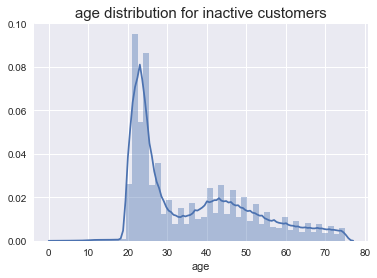

In [210]:
sns.distplot(inactive.age)
plt.title('age distribution for inactive customers', fontsize = 15)

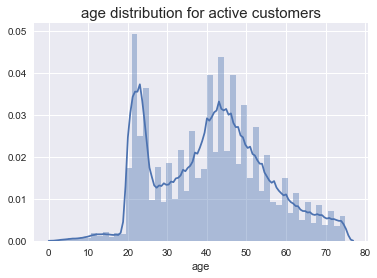

In [211]:
sns.distplot(active.age)
plt.title('age distribution for active customers', fontsize = 15)

The age distributions are different for active customers and inactive customers. Even thought these two are all biomodal distributions, for inactive custoemrs, customers from 20-30 years old are much more than customers 40-50 years old; for active customers, number of customers from 20-30 years old are similar to number of customers 40-50. 

##### inactive

In [136]:
explore_more_em(inactive)

first                            second                
country residence                ES                        9.956227e-01
                                 RO                        3.395152e-04
                                 CO                        3.319482e-04
                                 FR                        2.574205e-04
                                 AR                        2.475691e-04
                                 BR                        2.435715e-04
                                 EC                        2.377178e-04
                                 IT                        2.071643e-04
                                 GB                        2.007395e-04
                                 DE                        1.955996e-04
                                 MX                        1.811795e-04
                                 BO                        1.686154e-04
                                 PY                        1.644750e-04
        

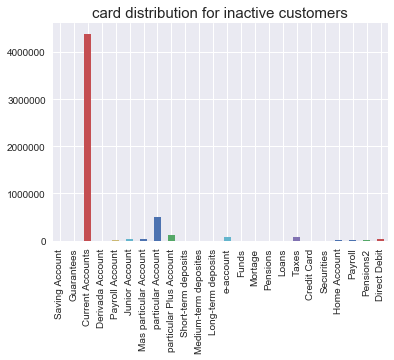

In [138]:
inactive_card = find_card(inactive)
inactive_card['card'].plot(kind = 'bar')
plt.title('card distribution for inactive customers', fontsize = 15)

* inactive customers like particular account except current account. 

##### active

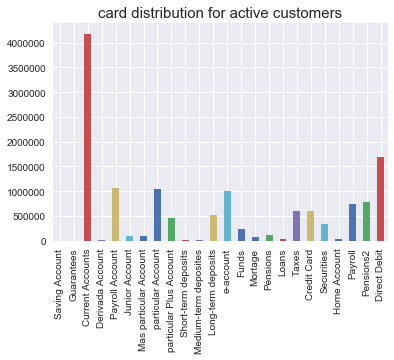

In [139]:
active_card = find_card(active)
active_card['card'].plot(kind = 'bar')
plt.title('card distribution for active customers', fontsize = 15)

* There are multiple cards active customers would like to hold: direct debit is the most popular card except current account. 
* Payroll account, particular account and e-account are the three popular cards. 

-----------------------------------------ind_empleado--------------------------------------------

In [24]:
notemployee = train_clean2[train_clean2.ind_empleado == 'N']
other = train_clean2[train_clean2.ind_empleado != 'N']

In [25]:
ex_exployeed = train_clean2[train_clean2.ind_empleado == 'B']
filial = train_clean2[train_clean2.ind_empleado == 'F']
active = train_clean2[train_clean2.ind_empleado == 'A']
passive = train_clean2[train_clean2.ind_empleado == 'S']

##### employment stuatus vs age

In [162]:
notemployee.age.describe()

count    1.304264e+07
mean     3.826291e+01
std      1.478700e+01
min      2.000000e+00
25%      2.400000e+01
50%      3.800000e+01
75%      4.900000e+01
max      7.500000e+01
Name: age, dtype: float64

In [163]:
other.age.describe()

count    8587.000000
mean       47.679050
std         6.050832
min        33.000000
25%        44.000000
50%        47.000000
75%        50.000000
max        72.000000
Name: age, dtype: float64

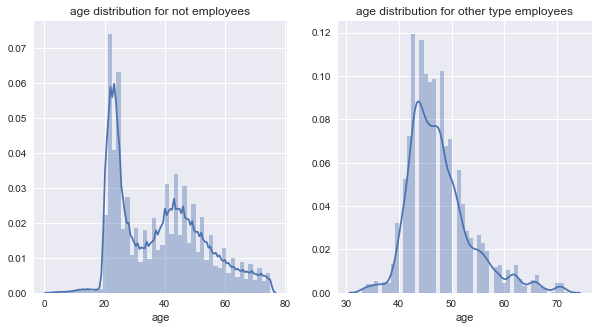

In [142]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax1 = sns.distplot(notemployee.age, ax=ax[0])
ax1.title.set_text('age distribution for not employees')
sns.distplot(other.age, ax=ax[1])
plt.title('age distribution for other type employees')
fig.show()

* Age distribution of unemployees is biomodal. A largest group of umemployees are between 20 to 30 and the second largest group of them are between 40 - 50 years old. 
* Customes except non-employee are older than 30 years old. Most of them are between 40-50 year old. Customers with filial and active employee status follow this age distribution. 
* filials and active customers have similar age distribution as the right plot. 

<font color='red'> plot has problem </font>

([<matplotlib.axis.XTick at 0x150455810>,
 <a list of 8 Text xticklabel objects>)

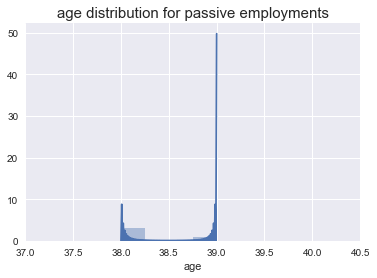

In [147]:
sns.distplot(passive.age)
plt.title('age distribution for passive employments', fontsize = 15)
plt.xticks(np.arange(37, 41, step=0.5))

Customers with passive employee status are between 38 or 39 years old.

##### employment stuatus vs household income

In [150]:
notemployee.renta.describe()

count    1.304264e+07
mean     3.826291e+01
std      1.478700e+01
min      2.000000e+00
25%      2.400000e+01
50%      3.800000e+01
75%      4.900000e+01
max      7.500000e+01
Name: age, dtype: float64

In [151]:
other.renta.describe()

count      8587.000000
mean     174054.146919
std      107004.394058
min       18185.580000
25%      101850.000000
50%      147322.770000
75%      209110.860000
max      894900.180000
Name: renta, dtype: float64

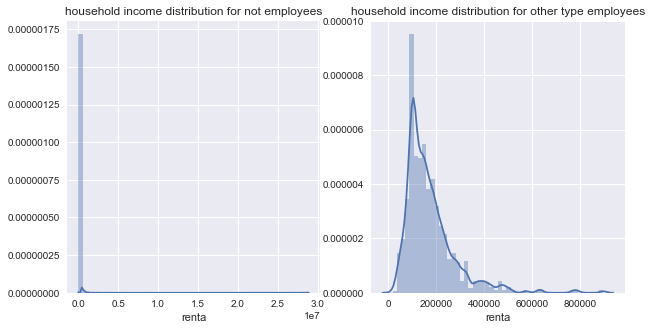

In [148]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax1 = sns.distplot(notemployee.renta, ax=ax[0])
ax1.title.set_text('household income distribution for not employees')
sns.distplot(other.renta, ax=ax[1])
plt.title('household income distribution for other type employees')
fig.show()

The left plot shows there is point mass on household income. Checking with data, we can find most of non-employed customers have 101850 income. Most of customers with other employment status have around 100,000 to 300,000 income.
According to data description, the mean household income for non-employed customers is 126,547 while mean household income for other customers is 174,054. The standard deviation for non-employees is 204,051, larger than standard deviation of other customers 107,004. 

##### employment stuatus vs date becoming customers

In [153]:
become_customer_date = notemployee.fecha_alta
become_customer_date = pd.DataFrame(become_customer_date.value_counts())
become_customer_date.index = pd.to_datetime(become_customer_date.index)
become_customer_date

,fecha_alta
2014-07-28,57224
2014-10-03,54170
2014-08-04,45679
2013-10-14,40719
2013-08-03,33414
2012-08-06,26085
2014-07-21,25944
2012-08-03,25328
2012-08-02,24969
2013-10-11,24622


In [154]:
other_customer_date = other.fecha_alta
other_cd_count = pd.DataFrame(other_customer_date.value_counts())
other_cd_count.index = pd.to_datetime(other_cd_count.index)
other_cd_count

,fecha_alta
1995-01-16,1175
1995-04-25,181
1995-03-10,153
1995-04-24,136
1996-04-17,119
1997-02-13,102
1998-05-11,102
1999-10-21,85
1997-11-03,85
1998-03-03,85


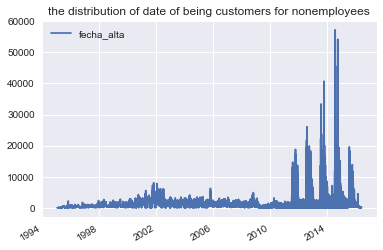

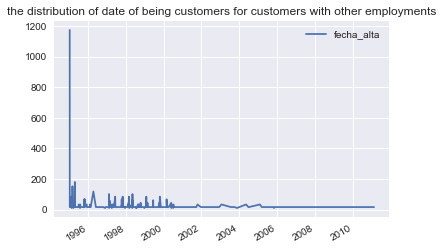

In [161]:

ax1 = become_customer_date.plot()
ax1.title.set_text('the distribution of date of being customers for nonemployees')
ax2 = other_cd_count.plot()
plt.title('the distribution of date of being customers for customers with other employments')
fig.show()

The plot shows date distribution about becoming customers are totally different for unemployments and customers with other employed status. Unemployed customers had high frequency of becoming customers after 2010. However, customers with other type employments had high frequency of becoming customers before 2000. The frequency of 1995 was much higher than other time. 

##### filial

In [238]:
explore_more_em(filial)

first                            second           
country residence                ES                   1.000000
gender                           H                    0.546572
                                 V                    0.453428
new customer                     0.0                  1.000000
primary customer                 1.0                  1.000000
customer_type_beginning          1.0                  1.000000
customer_relation                A                    0.908046
                                 I                    0.091954
residence_index                  S                    1.000000
foreign_index                    N                    1.000000
deceased index                   N                    1.000000
activity index                   1.0                  0.867618
                                 0.0                  0.132382
segmentation                     02 - PARTICULARES    0.780420
                                 01 - TOP             0.215220
    

In [66]:
filial_card = find_card(filial)

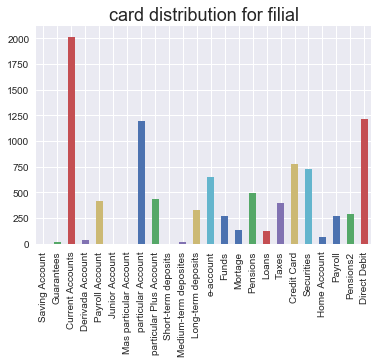

In [65]:
filial_card = find_card(filial)
filial_card['card'].plot(kind = 'bar')
plt.title('card distribution for filial', fontsize = 18)

* Most customers hold current account
* also many customers hold direct debit and particular account. 

##### active

In [240]:
explore_more_em(active)

first                            second           
country residence                ES                   0.993148
                                 AD                   0.006852
gender                           H                    0.627973
                                 V                    0.372027
new customer                     0.0                  1.000000
primary customer                 1.0                  1.000000
customer_type_beginning          1.0                  1.000000
customer_relation                A                    0.971786
                                 I                    0.028214
residence_index                  S                    0.993148
                                 N                    0.006852
foreign_index                    N                    1.000000
deceased index                   N                    1.000000
activity index                   1.0                  0.950020
                                 0.0                  0.049980
segm

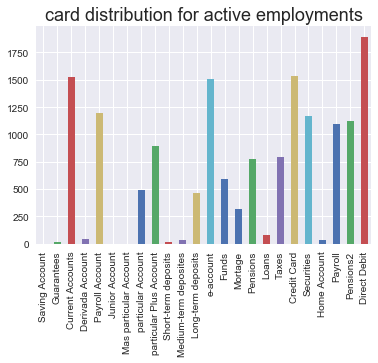

In [63]:
active_card = find_card(active)
active_card['card'].plot(kind = 'bar')
plt.title('card distribution for active employments', fontsize = 18)

* Direct debit is the most popular card for active employees. 
* Current account, e-account and credit card are also popular for active employees. 

##### passive

In [67]:
explore_more_em(passive)

first                            second           
country residence                ES                   1.000000
gender                           H                    1.000000
new customer                     0.0                  1.000000
primary customer                 1.0                  1.000000
customer_type_beginning          1.0                  1.000000
customer_relation                A                    1.000000
residence_index                  S                    1.000000
foreign_index                    N                    1.000000
deceased index                   N                    1.000000
activity index                   1.0                  1.000000
segmentation                     02 - PARTICULARES    0.823529
                                 01 - TOP             0.176471
employment status                S                    1.000000
age range                        31-40                1.000000
channel                          KAT                  1.000000
prov

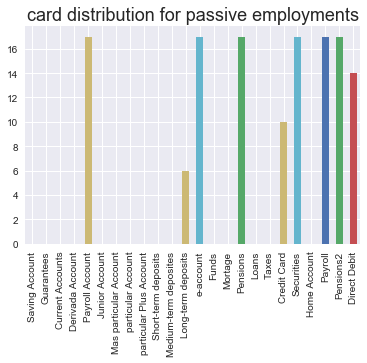

In [68]:
passive_card = find_card(passive)
passive_card['card'].plot(kind = 'bar')
plt.title('card distribution for passive employments', fontsize = 18)

* Payroll account, e-account, Pensions, Securities, payroll and pension2 are popular cards. 

--------------------------------------------sexo----------------------------------------------------------------------

In [77]:
male = train_clean2[train_clean2.sexo == 'H']
female = train_clean2[train_clean2.sexo == 'V']

##### male

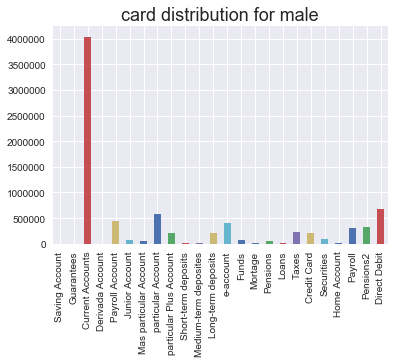

In [75]:
male_card = find_card(male)
male_card['card'].plot(kind = 'bar')
plt.title('card distribution for male', fontsize = 18)

##### female

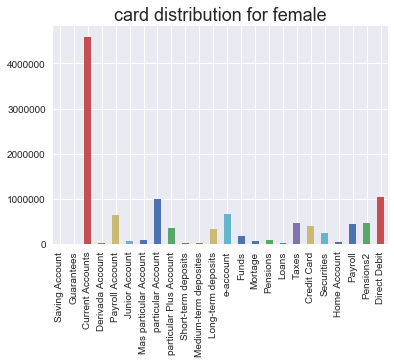

In [78]:
female_card = find_card(female)
female_card['card'].plot(kind = 'bar')
plt.title('card distribution for female', fontsize = 18)

There is no difference about the card distribution between male and female. So, there is no card particular for female or male. 

---------------------------------------------fecha_alta---------------------------------------------------------------

##### year

In [93]:
year_2015 = train_clean2[train_clean2.customer_y == 2015]
year_2016 = train_clean2[train_clean2.customer_y == 2016]

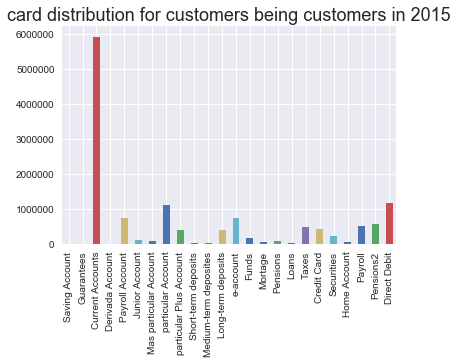

In [90]:
card_2015 = find_card(year_2015)
card_2015['card'].plot(kind = 'bar')
plt.title('card distribution for customers being customers in 2015', fontsize = 18)

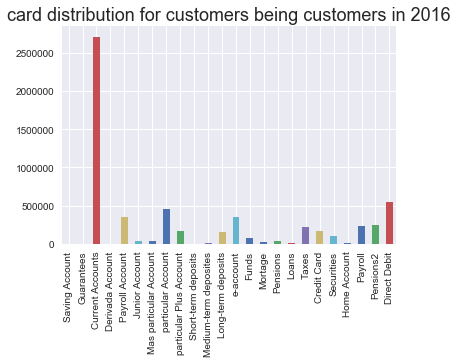

In [94]:
card_2016 = find_card(year_2016)
card_2016['card'].plot(kind = 'bar')
plt.title('card distribution for customers being customers in 2016', fontsize = 18)

##### day of week

In [16]:
train_clean3 = train_clean2.copy()
train_clean3['customer_weekday'] = np.where((train_clean2.custoemr_dow >= 0) & (train_clean2.custoemr_dow<=4), 'weekday', 'weekend')

In [17]:
weekday = train_clean3[train_clean3.customer_weekday == 'weekday']
weekend = train_clean3[train_clean3.customer_weekday == 'weekend']

In [18]:
weekday

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,custoemr_dow,customer_wom,customer_m,customer_y,lastprimary_dow,lastprimary_wom,lastprimary_m,lastprimary_y,bins,card number,customer_weekday
0,2015-01-28,1375586,N,ES,H,35.0,2015-01-12,0.0,6,1.0,2020-06-28,1,A,S,N,KHL,N,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,2,1,2015,6,4,6,2020,31-40,1.0,weekday
1,2015-01-28,1050611,N,ES,V,23.0,2012-08-10,0.0,35,1.0,2020-06-28,1,I,S,S,KHE,N,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,4,1,1,2015,6,4,6,2020,21-30,1.0,weekday
2,2015-01-28,1050612,N,ES,V,23.0,2012-08-10,0.0,35,1.0,2020-06-28,1,I,S,N,KHE,N,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,4,1,1,2015,6,4,6,2020,21-30,1.0,weekday
3,2015-01-28,1050613,N,ES,H,22.0,2012-08-10,0.0,35,1.0,2020-06-28,1,I,S,N,KHD,N,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,4,1,1,2015,6,4,6,2020,21-30,1.0,weekday
4,2015-01-28,1050614,N,ES,V,23.0,2012-08-10,0.0,35,1.0,2020-06-28,1,A,S,N,KHE,N,50.0,ZARAGOZA,1.0,101850.00,03 - UNIVERSITARIO,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,4,1,1,2015,6,4,6,2020,21-30,1.0,weekday
5,2015-01-28,1050615,N,ES,H,23.0,2012-08-10,0.0,35,1.0,2020-06-28,1,I,S,N,KHE,N,45.0,TOLEDO,0.0,22220.04,03 - UNIVERSITARIO,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,4,1,1,2015,6,4,6,2020,21-30,1.0,weekday
6,2015-01-28,1050616,N,ES,H,23.0,2012-08-10,0.0,35,1.0,2020-06-28,1,I,S,N,KHE,N,24.0,LEON,0.0,295590.36,03 - UNIVERSITARIO,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,4,1,1,2015,6,4,6,2020,21-30,1.0,weekday
7,2015-01-28,1050617,N,ES,H,23.0,2012-08-10,0.0,35,1.0,2020-06-28,1,A,S,N,KHE,N,50.0,ZARAGOZA,1.0,113316.66,03 - UNIVERSITARIO,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,4,1,1,2015,6,4,6,2020,21-30,1.0,weekday
8,2015-01-28,1050619,N,ES,H,24.0,2012-08-10,0.0,35,1.0,2020-06-28,1,I,S,N,KHE,N,20.0,GIPUZKOA,0.0,101850.00,03 - UNIVERSITARIO,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,4,1,1,2015,6,4,6,2020,21-30,1.0,weekday
9,2015-01-28,1050620,N,ES,H,23.0,2012-08-10,0.0,35,1.0,2020-06-28,1,I,S,N,KHE,N,10.0,CACERES,0.0,113194.98,03 - UNIVERSITARIO,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,4,1,1,2015,6,4,6,2020,21-30,1.0,weekday


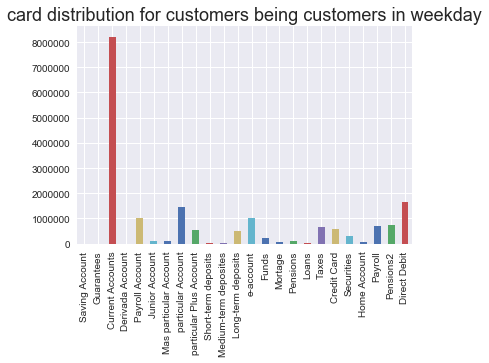

In [21]:
weekday = find_card(weekday)
weekday['card'].plot(kind = 'bar')
plt.title('card distribution for customers being customers in weekday', fontsize = 18)

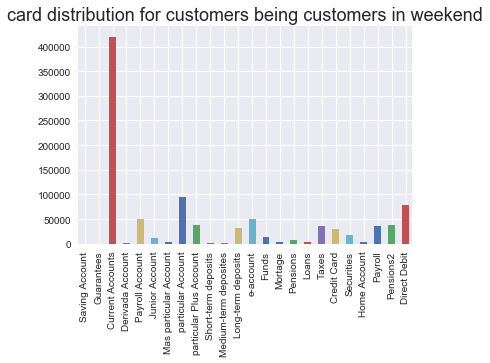

In [22]:
weekend_card = find_card(weekend)
weekend_card['card'].plot(kind = 'bar')
plt.title('card distribution for customers being customers in weekend', fontsize = 18)

* Particular account is the second popular item for customers who became customer in the weekend. 

-------------------------------------indrel_1mes: Customer type at the beginning of the month-------------------------

In [29]:
primary = train_clean2[train_clean2.indrel_1mes  == 1]
unknown = train_clean2[train_clean2.indrel_1mes == 'U']
not_primary = train_clean2[(train_clean2.indrel_1mes != 1) & (train_clean2.indrel_1mes != 'U')]

In [31]:
primary.age.describe()

count    1.292352e+07
mean     3.835724e+01
std      1.478059e+01
min      2.000000e+00
25%      2.400000e+01
50%      3.800000e+01
75%      4.900000e+01
max      7.500000e+01
Name: age, dtype: float64

In [32]:
not_primary.age.describe()

count    6574.000000
mean       43.943261
std        12.698686
min         5.000000
25%        35.000000
50%        43.000000
75%        52.000000
max        75.000000
Name: age, dtype: float64

In [33]:
unknown.age.describe()

count    121140.000000
mean         28.558420
std          11.767829
min           2.000000
25%          20.000000
50%          23.000000
75%          34.000000
max          75.000000
Name: age, dtype: float64

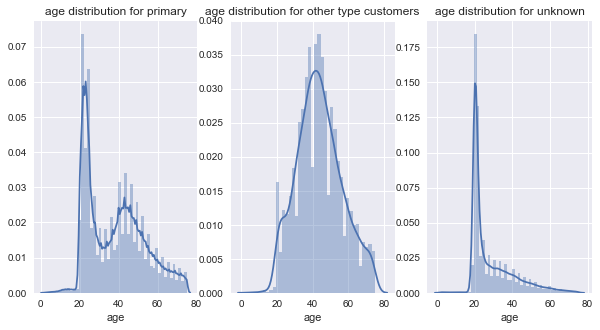

In [34]:
fig, ax =plt.subplots(nrows=1, ncols=3, figsize=(10,5))
ax1 = sns.distplot(primary.age, ax=ax[0])
ax1.title.set_text('age distribution for primary')
ax2 = sns.distplot(not_primary.age, ax=ax[1])
ax2.title.set_text('age distribution for other type customers')
sns.distplot(unknown.age, ax=ax[2])
plt.title('age distribution for unknown')
fig.show()

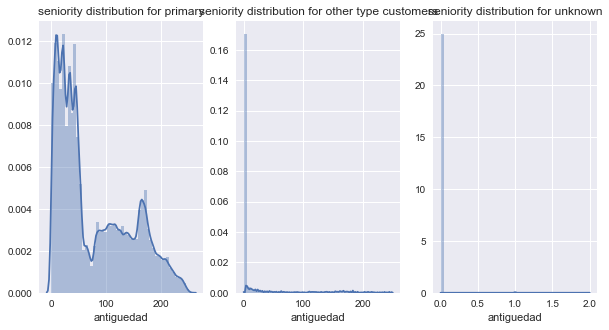

In [35]:
fig, ax =plt.subplots(nrows=1, ncols=3, figsize=(10,5))
ax1 = sns.distplot(primary.antiguedad, ax=ax[0])
ax1.title.set_text('seniority distribution for primary')
ax2 = sns.distplot(not_primary.antiguedad, ax=ax[1])
ax2.title.set_text('seniority distribution for other type customers')
sns.distplot(unknown.antiguedad, ax=ax[2])
plt.title('seniority distribution for unknown')
fig.show()

In [169]:
co_owner = train_clean2[train_clean2.indrel_1mes == 2]
former_primary = train_clean2[train_clean2.indrel_1mes == 3]
former_co_owner = train_clean2[train_clean2.indrel_1mes == 4]
potential = train_clean2[train_clean2.indrel_1mes == 'P']

##### co-owner

In [37]:
explore_more_em(co_owner)

first                            second                
country residence                ES                        1.000000
gender                           H                         0.619548
                                 V                         0.380452
new customer                     0.0                       0.725363
                                 1.0                       0.274637
primary customer                 1.0                       0.987884
                                 99.0                      0.012116
customer_type_beginning          2.0                       1.000000
customer_relation                A                         0.823910
                                 I                         0.176090
residence_index                  S                         1.000000
foreign_index                    N                         0.970113
                                 S                         0.029887
deceased index                   N                         1

* All of customers in this group are from ES.
* 73% of them are new customers. 82% of customers are active and 18% of customers are inactive.
* Segmentation of 99.7 of customers are unknown. 
* All of these customers are non-employed. 

In [164]:
co_active = []
for l in range(len(product)):
        co_active.append(co_owner.groupby([product[l], 'ind_actividad_cliente'])['ncodpers'].count())
co_active = pd.DataFrame(co_active)
co_active.index = ylabels 
co_active.columns.set_levels(['no card','card'],level=0,inplace=True)

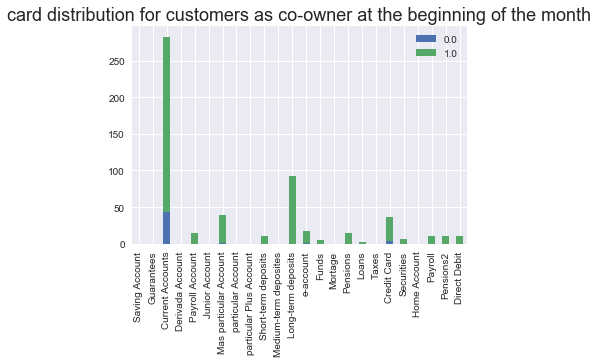

In [166]:
co_active['card'].plot(kind = 'bar', stacked = True)
plt.title('card distribution for customers as co-owner at the beginning of the month', fontsize = 18)

* Except current account, customers in this group like long-term deposits. 
* current account, mas particular account, e-account and credit card have inactive customers. 

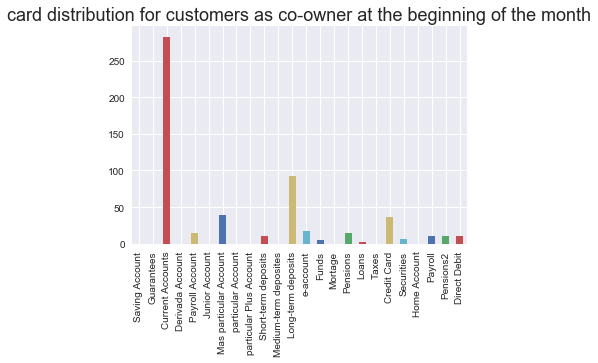

In [40]:
co_owner_card = find_card(co_owner)
co_owner_card['card'].plot(kind = 'bar')
plt.title('card distribution for customers as co-owner at the beginning of the month', fontsize = 18)

In [41]:
co_owner_act = co_owner[co_owner.ind_actividad_cliente == 1]
co_onwer_inact = co_owner[co_owner.ind_actividad_cliente == 0]

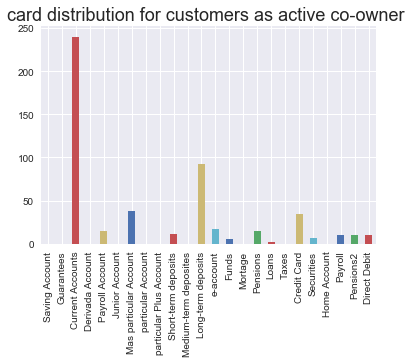

In [45]:
co_owner_act= find_card(co_owner_act)
co_owner_act['card'].plot(kind = 'bar')
plt.title('card distribution for customers as active co-owner ', fontsize = 18)

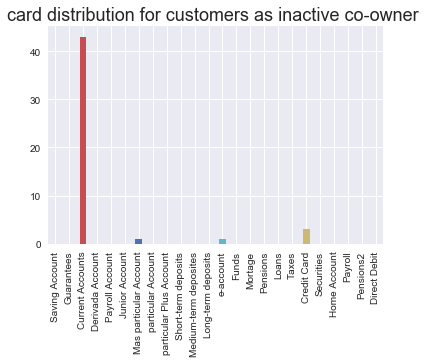

In [47]:
co_owner_inact= find_card(co_onwer_inact)
co_owner_inact['card'].plot(kind = 'bar')
plt.title('card distribution for customers as inactive co-owner ', fontsize = 18)

##### former primary

In [43]:
explore_more_em(former_primary)

first                            second                
country residence                ES                        0.999286
                                 AE                        0.000238
                                 HU                        0.000238
                                 GB                        0.000238
gender                           V                         0.684198
                                 H                         0.315802
new customer                     1.0                       0.992385
                                 0.0                       0.007615
primary customer                 1.0                       0.877439
                                 99.0                      0.122561
customer_type_beginning          3.0                       1.000000
customer_relation                P                         1.000000
residence_index                  S                         0.999286
                                 N                         0

* 99% of former customers are new customers who registered within last 6 months.
* 88% of them keep primary until then end of the month and 12% of them are not primary at the end of month.
* 57% of customers are active customers and 42% of customers are inactive customers. 

We could investigate the reason they did not activate card further. And we could find whether customers canceled primary activated cards and what type of cards they hold. The reason could be cards were not fit with customers. or they cancelled primary might due to complex activated process.

Customer relations of these customers are all former customers, the same with customer type at the beginning of the month. We could doubt colinarity between these two variables. 

In [181]:
former_primary_card = find_card(former_primary)

,no card,card
Saving Account,4202.0,NaN
Guarantees,4202.0,NaN
Current Accounts,2443.0,1759.0
Derivada Account,4202.0,NaN
Payroll Account,4149.0,53.0
Junior Account,4194.0,8.0
Mas particular Account,3855.0,347.0
particular Account,4201.0,1.0
particular Plus Account,4199.0,3.0
Short-term deposits,4112.0,90.0


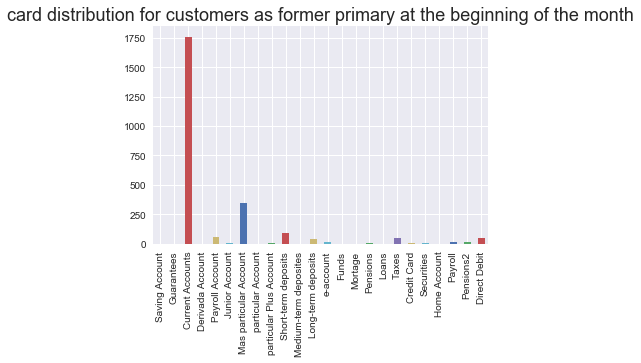

In [182]:
former_primary_card['card'].plot(kind = 'bar')
plt.title('card distribution for customers as former primary at the beginning of the month', fontsize = 18)

In [209]:
def find_card_more(df, col):
    b = []
    for l in range(len(product)):
        b.append(df.groupby([product[l], col])['ncodpers'].count())
    b = pd.DataFrame(b)
    b.index = ylabels 
    b.columns.set_levels(['no card','card'],level=0,inplace=True)
    return b

In [210]:
find_card_more(former_primary, 'indrel')

no card           card     
                           1.0    99.0    1.0  99.0
Saving Account           3687.0  515.0     NaN  NaN
Guarantees               3687.0  515.0     NaN  NaN
Current Accounts         1928.0  515.0  1759.0  NaN
Derivada Account         3687.0  515.0     NaN  NaN
Payroll Account          3634.0  515.0    53.0  NaN
Junior Account           3679.0  515.0     8.0  NaN
Mas particular Account   3340.0  515.0   347.0  NaN
particular Account       3686.0  515.0     1.0  NaN
particular Plus Account  3684.0  515.0     3.0  NaN
Short-term deposits      3597.0  515.0    90.0  NaN
Medium-term deposites    3687.0  515.0     NaN  NaN
Long-term deposits       3646.0  515.0    41.0  NaN
e-account                3675.0  515.0    12.0  NaN
Funds                    3686.0  515.0     1.0  NaN
Mortage                  3687.0  515.0     NaN  NaN
Pensions                 3684.0  515.0     3.0  NaN
Loans                    3687.0  515.0     NaN  NaN
Taxes                    3649.0  508.0    38.0  7.0
Credit Card              3685.0  515.0     2.0  NaN
Securities               3684.0  515.0     3.0  NaN
Home Account             3687.0  515.0     NaN  NaN
Payroll                  3670.0  515.0    17.0  NaN
Pensions2                3670.0  515.0    17.0  NaN
Direct Debit             3636.0  515.0    51.0  NaN

In [193]:
find_card_more(former_primary, 'ind_actividad_cliente')

no card           card        
                            0.0     1.0    0.0     1.0
Saving Account           2426.0  1776.0    NaN     NaN
Guarantees               2426.0  1776.0    NaN     NaN
Current Accounts         2075.0   368.0  351.0  1408.0
Derivada Account         2426.0  1776.0    NaN     NaN
Payroll Account          2418.0  1731.0    8.0    45.0
Junior Account           2422.0  1772.0    4.0     4.0
Mas particular Account   2423.0  1432.0    3.0   344.0
particular Account       2426.0  1775.0    NaN     1.0
particular Plus Account  2423.0  1776.0    3.0     NaN
Short-term deposits      2423.0  1689.0    3.0    87.0
Medium-term deposites    2426.0  1776.0    NaN     NaN
Long-term deposits       2424.0  1737.0    2.0    39.0
e-account                2423.0  1767.0    3.0     9.0
Funds                    2426.0  1775.0    NaN     1.0
Mortage                  2426.0  1776.0    NaN     NaN
Pensions                 2426.0  1773.0    NaN     3.0
Loans                    2426.0  1776.0    NaN     NaN
Taxes                    2419.0  1738.0    7.0    38.0
Credit Card              2426.0  1774.0    NaN     2.0
Securities               2426.0  1773.0    NaN     3.0
Home Account             2426.0  1776.0    NaN     NaN
Payroll                  2425.0  1760.0    1.0    16.0
Pensions2                2425.0  1760.0    1.0    16.0
Direct Debit             2424.0  1727.0    2.0    49.0

* former primary customers like current accounts and mas particular account.
* by further checking, most of customers holding mas particular account are active customers
* almost all customers are new customers. 
* only 7 customers of taxes are not primary at the end of the month

##### former co-owner

In [56]:
explore_more_em(former_co_owner)

first                            second        
country residence                ES                1.000000
gender                           H                 0.658703
                                 V                 0.341297
new customer                     1.0               0.996587
                                 0.0               0.003413
primary customer                 1.0               0.952218
                                 99.0              0.047782
customer_type_beginning          4.0               1.000000
customer_relation                P                 1.000000
residence_index                  S                 1.000000
foreign_index                    N                 0.982935
                                 S                 0.017065
deceased index                   N                 1.000000
activity index                   1.0               0.518771
                                 0.0               0.481229
segmentation                     U                 1

* 99% of customers are new customers.
* 95% of cusotmers are primary customers and 5% are non-primary customers at the end of the month.
* all of them are former customers.
* 52% of cusotmers activated cards and 48% did not. 

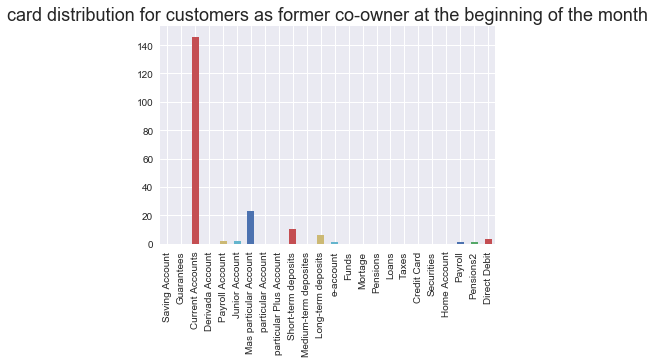

In [58]:
former_co_owner_card = find_card(former_co_owner)
former_co_owner_card['card'].plot(kind = 'bar')
plt.title('card distribution for customers as former co-owner at the beginning of the month', fontsize = 18)

In [214]:
find_card_more(former_co_owner, 'ind_actividad_cliente')

no card         card       
                            0.0    1.0   0.0    1.0
Saving Account            141.0  152.0   NaN    NaN
Guarantees                141.0  152.0   NaN    NaN
Current Accounts          121.0   26.0  20.0  126.0
Derivada Account          141.0  152.0   NaN    NaN
Payroll Account           139.0  152.0   2.0    NaN
Junior Account            141.0  150.0   NaN    2.0
Mas particular Account    141.0  129.0   NaN   23.0
particular Account        141.0  152.0   NaN    NaN
particular Plus Account   141.0  152.0   NaN    NaN
Short-term deposits       141.0  142.0   NaN   10.0
Medium-term deposites     141.0  152.0   NaN    NaN
Long-term deposits        141.0  146.0   NaN    6.0
e-account                 141.0  151.0   NaN    1.0
Funds                     141.0  152.0   NaN    NaN
Mortage                   141.0  152.0   NaN    NaN
Pensions                  141.0  152.0   NaN    NaN
Loans                     141.0  152.0   NaN    NaN
Taxes                     141.0  152.0   NaN    NaN
Credit Card               141.0  152.0   NaN    NaN
Securities                141.0  152.0   NaN    NaN
Home Account              141.0  152.0   NaN    NaN
Payroll                   141.0  151.0   NaN    1.0
Pensions2                 141.0  151.0   NaN    1.0
Direct Debit              141.0  149.0   NaN    3.0

* The card distribution for former co-onwer is similar to fomrer priamry customers. 
* Customers of former primary customers and former co-onwers have former type at the beginning of the month. 
* 20 customers in current account and 2 customers in payroll acount are inactive. 

------------------------------tiprel_1mes: customer relation type at the beginning of the month-----------------------

In [60]:
inactive = train_clean2[train_clean2.tiprel_1mes == 'I']
active = train_clean2[train_clean2.tiprel_1mes == 'A']
former_customer = train_clean2[train_clean2.tiprel_1mes == 'P']
potential_customer = train_clean2[train_clean2.tiprel_1mes == 'R']

former customer includes former primary and former co-owner in 'indrel_1mes'.


In [64]:
tiprel_1mes_count = train_clean2.tiprel_1mes.value_counts(normalize = True)
tiprel_1mes_count

I    5.366623e-01
A    4.536469e-01
U    9.281883e-03
P    3.444120e-04
R    6.413188e-05
N    3.064845e-07
Name: tiprel_1mes, dtype: float64

##### age distribution 

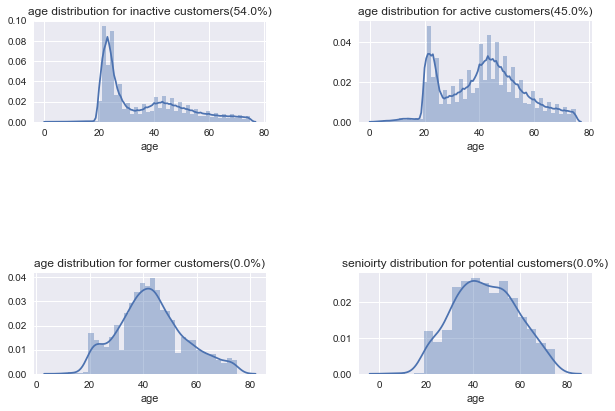

In [72]:
fig, ax =plt.subplots(nrows=2, ncols=2, figsize=(10,5))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)
ax1 = sns.distplot(inactive.age, ax=ax[0,0])
ax1.title.set_text('age distribution for inactive customers(' 
                   + str(round(float(tiprel_1mes_count.values[0]),2)*100) +'%)')

ax2 = sns.distplot(actie.age, ax=ax[0,1])
ax2.title.set_text('age distribution for active customers(' 
                   + str(round(float(tiprel_1mes_count.values[1]),2)*100) +'%)')

ax3 = sns.distplot(former_customer.age, ax=ax[1,0])
ax3.title.set_text('age distribution for former customers(' 
                   + str(round(float(tiprel_1mes_count.values[3]),2)*100) +'%)')

ax4 = sns.distplot(potential_customer.age, ax=ax[1,1])
ax4.title.set_text('senioirty distribution for potential customers(' 
                   + str(round(float(tiprel_1mes_count.values[4]),2)*100) +'%)')

fig.show()

##### seniority distribution

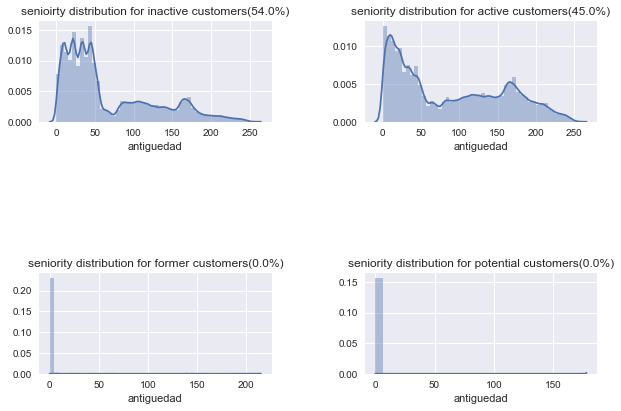

In [67]:
fig, ax =plt.subplots(nrows=2, ncols=2, figsize=(10,5))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)
ax1 = sns.distplot(inactive.antiguedad, ax=ax[0,0])
ax1.title.set_text('senioirty distribution for inactive customers(' 
                   + str(round(float(tiprel_1mes_count.values[0]),2)*100) +'%)')
ax2 = sns.distplot(active.antiguedad, ax=ax[0,1])
ax2.title.set_text('seniority distribution for active customers('
                    + str(round(float(tiprel_1mes_count.values[1]),2)*100) +'%)')
ax3 = sns.distplot(former_customer.antiguedad, ax=ax[1,0])
ax3.title.set_text('seniority distribution for former customers('
                  + str(round(float(tiprel_1mes_count.values[3]),2)*100) +'%)')
sns.distplot(potential_customer.antiguedad, ax=ax[1,1])
plt.title('seniority distribution for potential customers('
         + str(round(float(tiprel_1mes_count.values[4]),2)*100) +'%)')
fig.show()

##### inactive 

In [73]:
explore_more_em(inactive)

first                            second                
country residence                ES                        9.956227e-01
                                 RO                        3.395152e-04
                                 CO                        3.319482e-04
                                 FR                        2.574205e-04
                                 AR                        2.475691e-04
                                 BR                        2.435715e-04
                                 EC                        2.377178e-04
                                 IT                        2.071643e-04
                                 GB                        2.007395e-04
                                 DE                        1.955996e-04
                                 MX                        1.811795e-04
                                 BO                        1.686154e-04
                                 PY                        1.644750e-04
        

* only firtst/primary customers and co-owner customers have inactive type at the beginning of the month. 99% of them are primary customers.
* 5% have birth country different than the bank country.
* 91 of customer are inactive customers. 
* 50% of customers are universitario segmentation and 49.5% of them are particular segmentation. 
* Most customers are 20-30 years old and a large part of customer are around 45 years old. 
* Most customers have 0 to 50 months and a large part of cusotmers have 150-200 months.

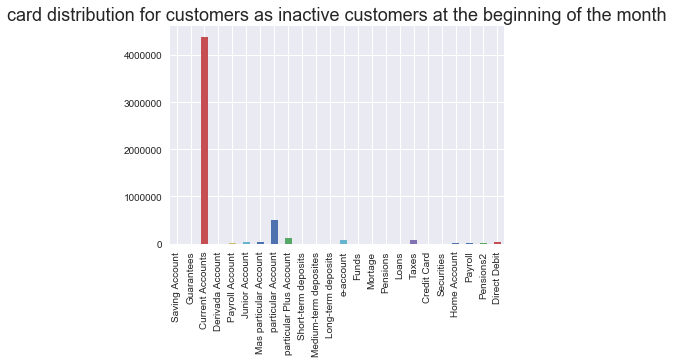

In [74]:
inactive_card = find_card(inactive)
inactive_card['card'].plot(kind = 'bar')
plt.title('card distribution for customers as inactive customers at the beginning of the month', fontsize = 18)

##### active

In [76]:
explore_more_em(active)

first                            second                
country residence                ES                        9.944835e-01
                                 GB                        5.193686e-04
                                 DE                        5.178485e-04
                                 FR                        4.962292e-04
                                 AR                        4.526529e-04
                                 US                        3.840794e-04
                                 CH                        2.634845e-04
                                 IT                        2.330825e-04
                                 VE                        2.183881e-04
                                 MX                        2.087608e-04
                                 CO                        1.797100e-04
                                 BE                        1.672113e-04
                                 PT                        1.432275e-04
        

* 90% of customers in this group are active customers. 
* 67% of customers are particulares segmentation and 24% of customers are universitario segmentation. 
* age distribution is a biomodal distribution. It has two modes: 22 and 45 years old. Customers between 25 to 40 years old are fewer. 
* most of customers have seniority 0 to 20 months and a large part of customers have 150-200 months. 

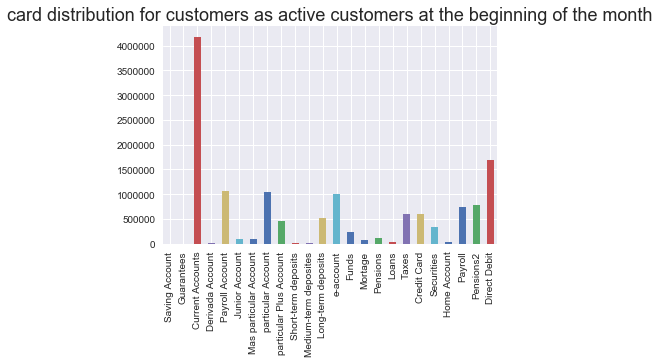

In [218]:
active_card = find_card(active)
active_card['card'].plot(kind = 'bar')
plt.title('card distribution for customers as active customers at the beginning of the month', fontsize = 18)

* Except current account, customers prefer Direct debit. 
* Payroll, particular account and e-account are also popular accounts for active custoemrs.


##### former customer

In [78]:
explore_more_em(former_customer)

first                            second                
country residence                ES                        0.999333
                                 AE                        0.000222
                                 HU                        0.000222
                                 GB                        0.000222
gender                           V                         0.661846
                                 H                         0.338154
new customer                     1.0                       0.992659
                                 0.0                       0.007341
primary customer                 1.0                       0.882314
                                 99.0                      0.117686
customer_type_beginning          3.0                       0.934816
                                 4.0                       0.065184
customer_relation                P                         1.000000
residence_index                  S                         0

* 88% of customers are primary customers and 12% are not at the end of the month.
* 99% of customers are new customers.
* customer types at the beginning of the month are former primary or former co-owner.
* 97% of customers are unknown segmentation. 

##### potential customer

In [79]:
explore_more_em(potential_customer)

first                            second                
country residence                ES                        0.998805
                                 GB                        0.001195
gender                           H                         0.532855
                                 V                         0.465950
                                 U                         0.001195
new customer                     1.0                       0.998805
                                 0.0                       0.001195
primary customer                 1.0                       0.966547
                                 99.0                      0.033453
customer_type_beginning          P                         1.000000
customer_relation                R                         1.000000
residence_index                  S                         0.998805
                                 N                         0.001195
foreign_index                    N                         0

* almost all customers are new customers. 
* all customers are potential customer at the beginning of the month. 
* all customers have unknown segmentation.
* all customers are non-employees. 

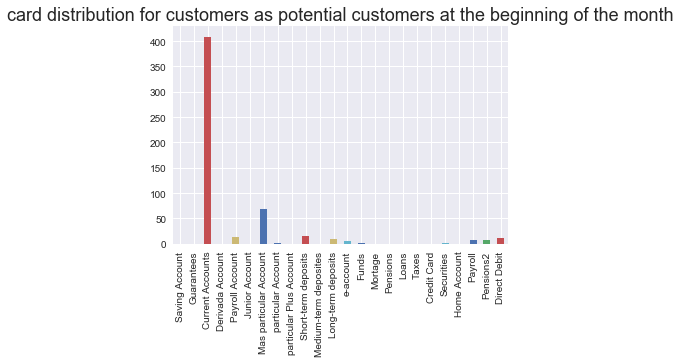

In [80]:
potential_card = find_card(potential_customer)
potential_card['card'].plot(kind = 'bar')
plt.title('card distribution for customers as potential customers at the beginning of the month', fontsize = 18)

* current account and mas particular account are two most popular cards for potential customers. 

-------------------------------------------indext: foreigner index----------------------------------------------------

In [81]:
foreigner = train_clean2[train_clean2.indext == 'S']

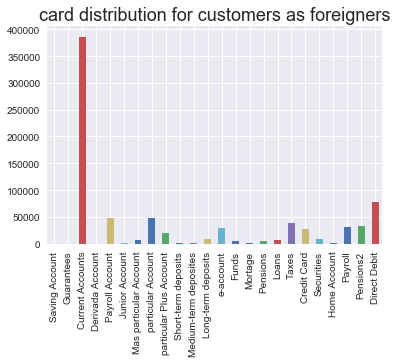

In [83]:
foreigner_card = find_card(foreigner)
foreigner_card['card'].plot(kind = 'bar')
plt.title('card distribution for customers as foreigners', fontsize = 18)

The card distribution is similar to the general distribution. There is no specific card especially for foreigners. 

------------------------------------------------------indfall: Deceased index ----------------------------------------

In [84]:
decease = train_clean2[train_clean2.indfall == 'S']

In [86]:
explore_more_em(decease)

first                            second                
country residence                ES                        0.995098
                                 FR                        0.002451
                                 BE                        0.001225
                                 IT                        0.001225
gender                           V                         0.769913
                                 H                         0.230087
new customer                     0.0                       0.998991
                                 1.0                       0.001009
primary customer                 1.0                       0.983854
                                 99.0                      0.016146
customer_type_beginning          1.0                       0.999928
                                 3.0                       0.000072
customer_relation                A                         0.609962
                                 I                         0

* 77% of customers in this group are female and 23% of customers in this group are male. 
* 61% of customers are active customers, 39% of customers are inactive customers.
* 90% of customer are particulares segmentation. 

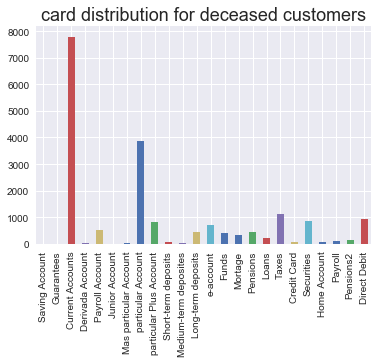

In [88]:
decease_card = find_card(decease)
decease_card['card'].plot(kind = 'bar')
plt.title('card distribution for deceased customers', fontsize = 18)

* Current account is the most popular card. 
* particular account is the second most popular card. The number of this card is much larger than other cards. 

------------------------------------------segmento: segmentation------------------------------------------------------

In [89]:
top = train_clean2[train_clean2.segmento == '01 - TOP']
pariticulares = train_clean2[train_clean2.segmento == '02 - PARTICULARES']
university = train_clean2[train_clean2.segmento == '03 - UNIVERSITARIO']
unknow_seg = train_clean2[train_clean2.segmento == 'U']

##### VIP

In [94]:
explore_more_em(top)

first                            second                
country residence                ES                        0.993002
                                 DE                        0.000842
                                 GB                        0.000830
                                 CH                        0.000587
                                 US                        0.000583
                                 MX                        0.000362
                                 VE                        0.000350
                                 AR                        0.000323
                                 IT                        0.000321
                                 FR                        0.000300
                                 BR                        0.000233
                                 AU                        0.000182
                                 NL                        0.000182
                                 BE                        0

* 98.45% of customers are active customers. 

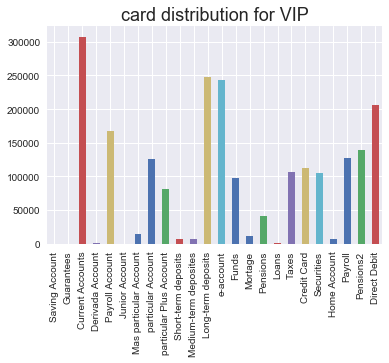

In [90]:
top_card = find_card(top)
top_card['card'].plot(kind = 'bar')
plt.title('card distribution for VIP', fontsize = 18)

VIP customers would like to hold Current account, long-term depostis, e-account and direct debit. 

##### individual

In [95]:
explore_more_em(pariticulares)

first                            second                
country residence                ES                        0.992644
                                 FR                        0.000566
                                 AR                        0.000556
                                 GB                        0.000522
                                 DE                        0.000505
                                 US                        0.000409
                                 CO                        0.000404
                                 RO                        0.000369
                                 EC                        0.000285
                                 VE                        0.000258
                                 BR                        0.000254
                                 IT                        0.000244
                                 MX                        0.000218
                                 CH                        0

* 6% of customers with particular segmentation are born in different country than the bank country.

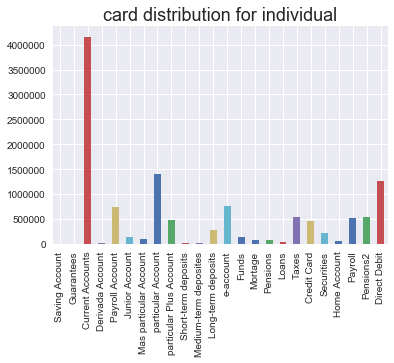

In [92]:
individual_card = find_card(pariticulares)
individual_card['card'].plot(kind = 'bar')
plt.title('card distribution for individual', fontsize = 18)

##### college graduates

In [96]:
explore_more_em(university)

first                            second                
country residence                ES                        0.999037
                                 IT                        0.000166
                                 MX                        0.000139
                                 FR                        0.000071
                                 CO                        0.000067
                                 BR                        0.000065
                                 CN                        0.000051
                                 DE                        0.000045
                                 GB                        0.000032
                                 RO                        0.000032
                                 MA                        0.000029
                                 PT                        0.000027
                                 PE                        0.000026
                                 PL                        0

In [107]:
university

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,custoemr_dow,customer_wom,customer_m,customer_y,lastprimary_dow,lastprimary_wom,lastprimary_m,lastprimary_y,bins,card number
1,2015-01-28,1050611,N,ES,V,23.0,2012-08-10,0.0,35,1.0,2020-06-28,1,I,S,S,KHE,N,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,4,1,1,2015,6,4,6,2020,21-30,1.0
2,2015-01-28,1050612,N,ES,V,23.0,2012-08-10,0.0,35,1.0,2020-06-28,1,I,S,N,KHE,N,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,4,1,1,2015,6,4,6,2020,21-30,1.0
3,2015-01-28,1050613,N,ES,H,22.0,2012-08-10,0.0,35,1.0,2020-06-28,1,I,S,N,KHD,N,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,4,1,1,2015,6,4,6,2020,21-30,1.0
4,2015-01-28,1050614,N,ES,V,23.0,2012-08-10,0.0,35,1.0,2020-06-28,1,A,S,N,KHE,N,50.0,ZARAGOZA,1.0,101850.00,03 - UNIVERSITARIO,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,4,1,1,2015,6,4,6,2020,21-30,1.0
5,2015-01-28,1050615,N,ES,H,23.0,2012-08-10,0.0,35,1.0,2020-06-28,1,I,S,N,KHE,N,45.0,TOLEDO,0.0,22220.04,03 - UNIVERSITARIO,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,4,1,1,2015,6,4,6,2020,21-30,1.0
6,2015-01-28,1050616,N,ES,H,23.0,2012-08-10,0.0,35,1.0,2020-06-28,1,I,S,N,KHE,N,24.0,LEON,0.0,295590.36,03 - UNIVERSITARIO,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,4,1,1,2015,6,4,6,2020,21-30,1.0
7,2015-01-28,1050617,N,ES,H,23.0,2012-08-10,0.0,35,1.0,2020-06-28,1,A,S,N,KHE,N,50.0,ZARAGOZA,1.0,113316.66,03 - UNIVERSITARIO,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,4,1,1,2015,6,4,6,2020,21-30,1.0
8,2015-01-28,1050619,N,ES,H,24.0,2012-08-10,0.0,35,1.0,2020-06-28,1,I,S,N,KHE,N,20.0,GIPUZKOA,0.0,101850.00,03 - UNIVERSITARIO,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,4,1,1,2015,6,4,6,2020,21-30,1.0
9,2015-01-28,1050620,N,ES,H,23.0,2012-08-10,0.0,35,1.0,2020-06-28,1,I,S,N,KHE,N,10.0,CACERES,0.0,113194.98,03 - UNIVERSITARIO,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,4,1,1,2015,6,4,6,2020,21-30,1.0
10,2015-01-28,1050621,N,ES,V,23.0,2012-08-10,0.0,35,1.0,2020-06-28,1,I,S,N,KHE,N,50.0,ZARAGOZA,0.0,72575.88,03 - UNIVERSITARIO,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,4,1,1,2015,6,4,6,2020,21-30,1.0


* 3.6% of customers are born in different country than the bank country.
* 70% of university customers are inactive
* all of cusomters are non-employees. 

In [118]:
college_activate = []
for l in range(len(product)):
        college_activate.append(university.groupby([product[l], 'ind_actividad_cliente'])['ncodpers'].count())
a = pd.DataFrame(college_activate)
a.index = ylabels 

In [123]:
a.columns.set_levels(['no card','card'],level=0,inplace=True)

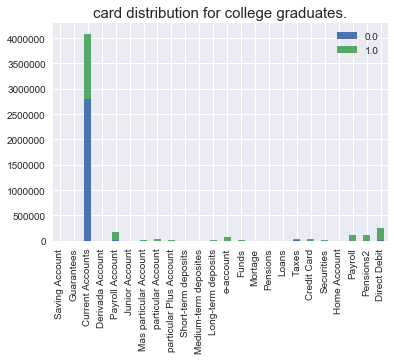

In [129]:
a['card'].plot(kind = 'bar', stacked = True)
plt.title('card distribution for college graduates.',fontsize = 15)

* current account is the most popular account for college graduates.
* we find there are 30% inactive customers and it seems that inactive customers are current accounts holders.  